In [10]:
import SIMSIToolBox
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from copy import deepcopy
from sklearn.cluster import KMeans
import pickle as pkl
import molmass
import SIMSIToolBox.recalibration
import importlib
importlib.reload(SIMSIToolBox)
import seaborn as sb
import matplotlib

In [7]:
datadir = "X:/MSI_Shared_Data/13CImagingManuscript/raw_data_2/non-perfused/maldi/13C/"
subdirs = ["12x","14x"]

In [8]:
peaklist = pd.read_csv(datadir + "../metabolites_with_signal_to_extract_annotated.csv")
peaklist

ion      formula adduct          mz  \
0   C10H14N5O7P-H-  C10H14N5O7P    M-H  346.055729   
1   C10H17N3O6S-H-  C10H17N3O6S    M-H  306.076451   
2        C10H9N-H-       C10H9N    M-H  142.066144   
3      C12H14N2-H-     C12H14N2    M-H  185.108343   
4      C16H32O2-H-     C16H32O2    M-H  255.232875   
5      C18H36O2-H-     C18H36O2    M-H  283.264176   
6      C20H32O2-H-     C20H32O2    M-H  303.232875   
7      C2H7NO3S-H-     C2H7NO3S    M-H  124.007309   
8       C3H7O7P-H-      C3H7O7P    M-H  184.985584   
9     C4H12NO4P-H-    C4H12NO4P    M-H  168.043039   
10       C4H6O5-H-       C4H6O5    M-H  133.014168   
11      C4H7NO4-H-      C4H7NO4    M-H  132.030153   
12    C5H10N2O3-H-    C5H10N2O3    M-H  145.061787   
13      C5H9NO3-H-      C5H9NO3    M-H  130.050888   
14      C5H9NO4-H-      C5H9NO4    M-H  146.045803   
15     C6H11O8P-H-     C6H11O8P    M-H  241.011799   
16     C6H13O9P-H-     C6H13O9P    M-H  259.022363   
17      C6H9NO5-H-      C6H9NO5    M-H  174.040717   
18     C7H12O3S-H-     C7H12O3S    M-H  175.043360   

                                     name  labeling trend  \
0                                     AMP               1   
1                             Glutathione               1   
2                       6-Methylquinoline               0   
3                              Detomidine               0   
4                               Palmitate               1   
5                                Stearate               1   
6                            Arachidonate               1   
7                                 Taurine               0   
8                                     2PG               0   
9             Phosphodimethylethanolamine               0   
10                                 Malate               0   
11                              Aspartate               0   
12                              Glutamine               0   
13                       4-hydroxyproline               0   
14                              Glutamate               0   
15              Inositol cyclic phosphate               0   
16                       Hexose phosphate               0   
17                     N-acetyl-aspartate               1   
18  Methylthio 2-(propanoyloxy)propanoate               0   

    pool size trend in tumor  14x  12x  10x  8x  100um  50um  \
0                          1    0    1    0   0      1     1   
1                          1    1    1    0   0      1     1   
2                          0    1    1    0   0      0     1   
3                          0    0    1    0   0      1     1   
4                          1    0    1    0   0      1     1   
5                          1    0    1    0   0      0     1   
6                          1    0    1    0   0      1     1   
7                          0    1    1    1   0      1     1   
8                          0    1    0    0   0      1     0   
9                          0    1    1    1   1      1     1   
10                         1    1    1    0   0      1     1   
11                         1    1    1    1   1      1     1   
12                         1    1    1    0   0      1     1   
13                         1    1    1    0   0      1     1   
14                         1    1    1    0   0      1     1   
15                         1    1    1    0   0      1     1   
16                         1    1    0    0   0      1     1   
17                         1    1    0    0   0      0     1   
18                         1    1    1    0   0      1     0   

                           comment  \
0                              NaN   
1                              NaN   
2                              NaN   
3                              NaN   
4   some interference at 14x 50 um   
5                              NaN   
6                              NaN   
7                              NaN   
8                              NaN   
9                              NaN   
10            

In [11]:
ppmThresh = 5
num_cores = 20
intensityCutoff = 100
convSquare = 3 #size of filter (1=1x1,3=3x3,5=5x5)
colormap = matplotlib.colormaps["viridis"]
#LinearSegmentedColormap.from_list("test",colors=["black", "navy","blue","cyan","yellow","orange","orangered","red","mistyrose","white"],N=256)
dm_method = "PCA" #method for dimensionality reduction ("PCA" or "TSNE") PCA has worked better for me
seg_method = "K_means" #thresholding method ("TIC_auto", "K_means", "TIC_manual")
num_components = 2 #number of compoents to use with PCA or TSNE
filtMethod = "GB" #filtering method (GB = gaussian blur, MA = moving average)

c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\pyimzml\ontology\ontology.py:94: UserWarning: Accession IMS:1000046 found with incorrect name "pixel size x". Updating name to "pixel size (x)".
  % (accession, raw_name, name)


300 peaks found
12 hits found
12 peaks in roi found


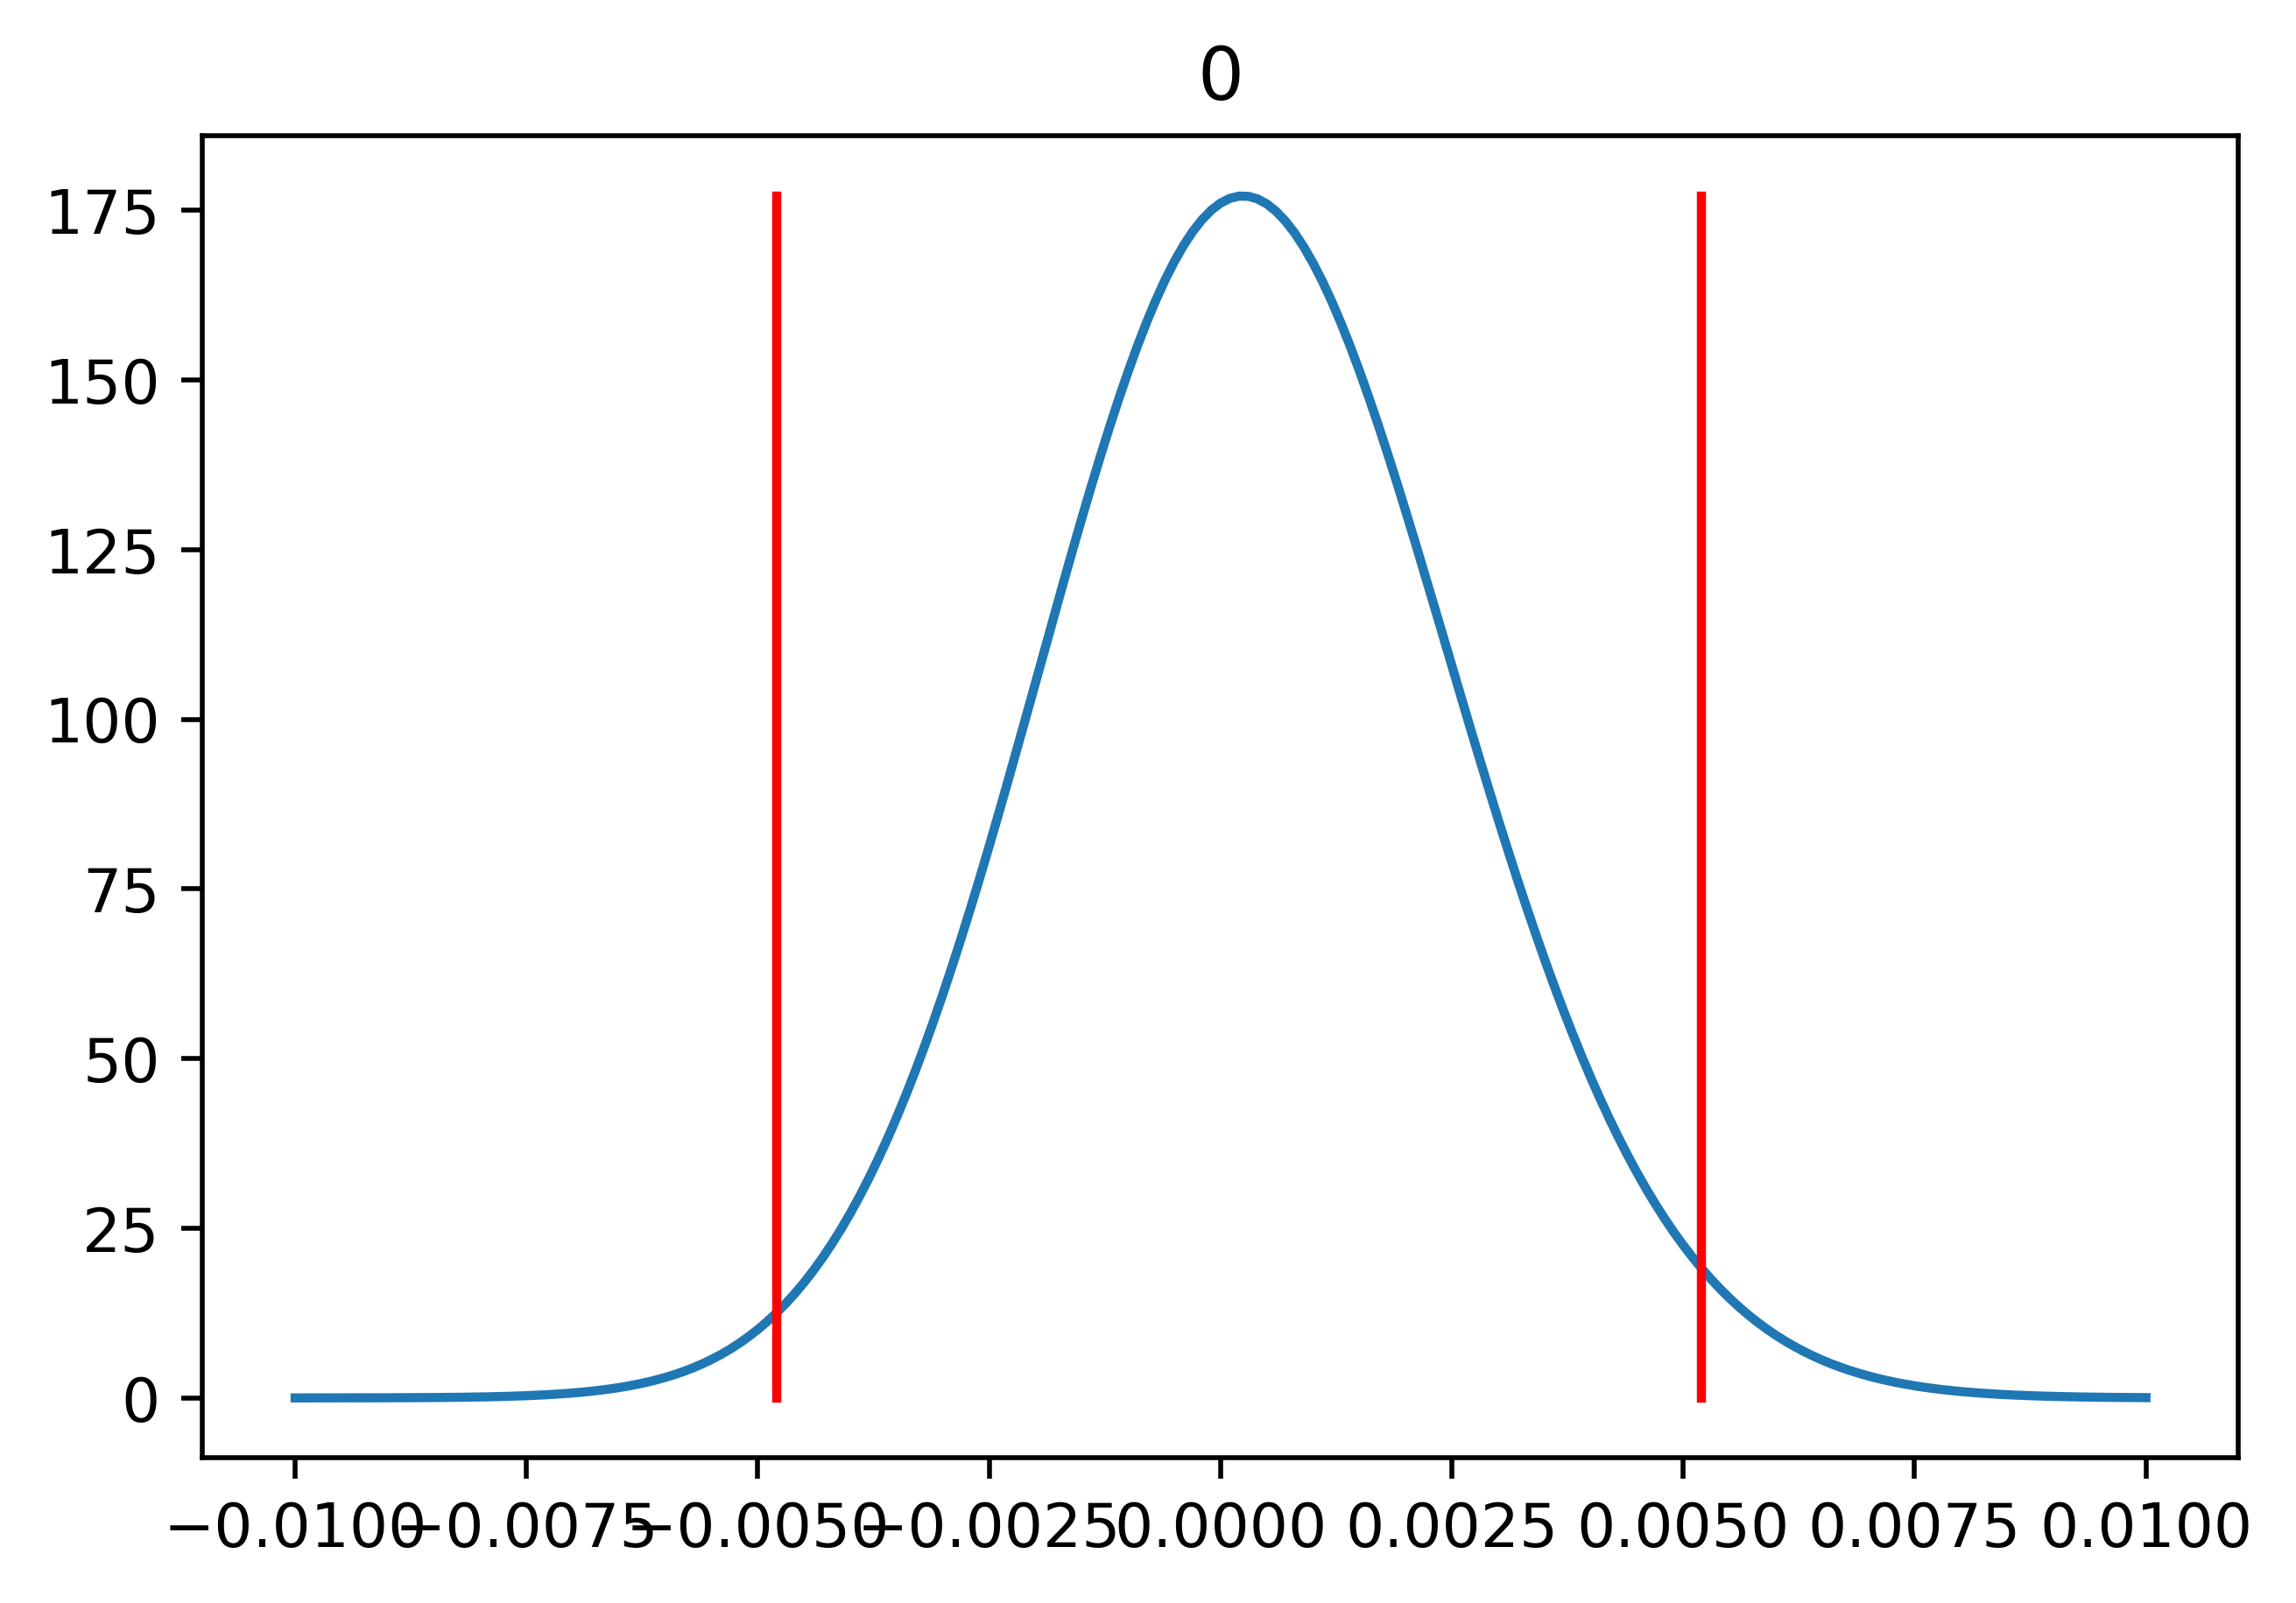

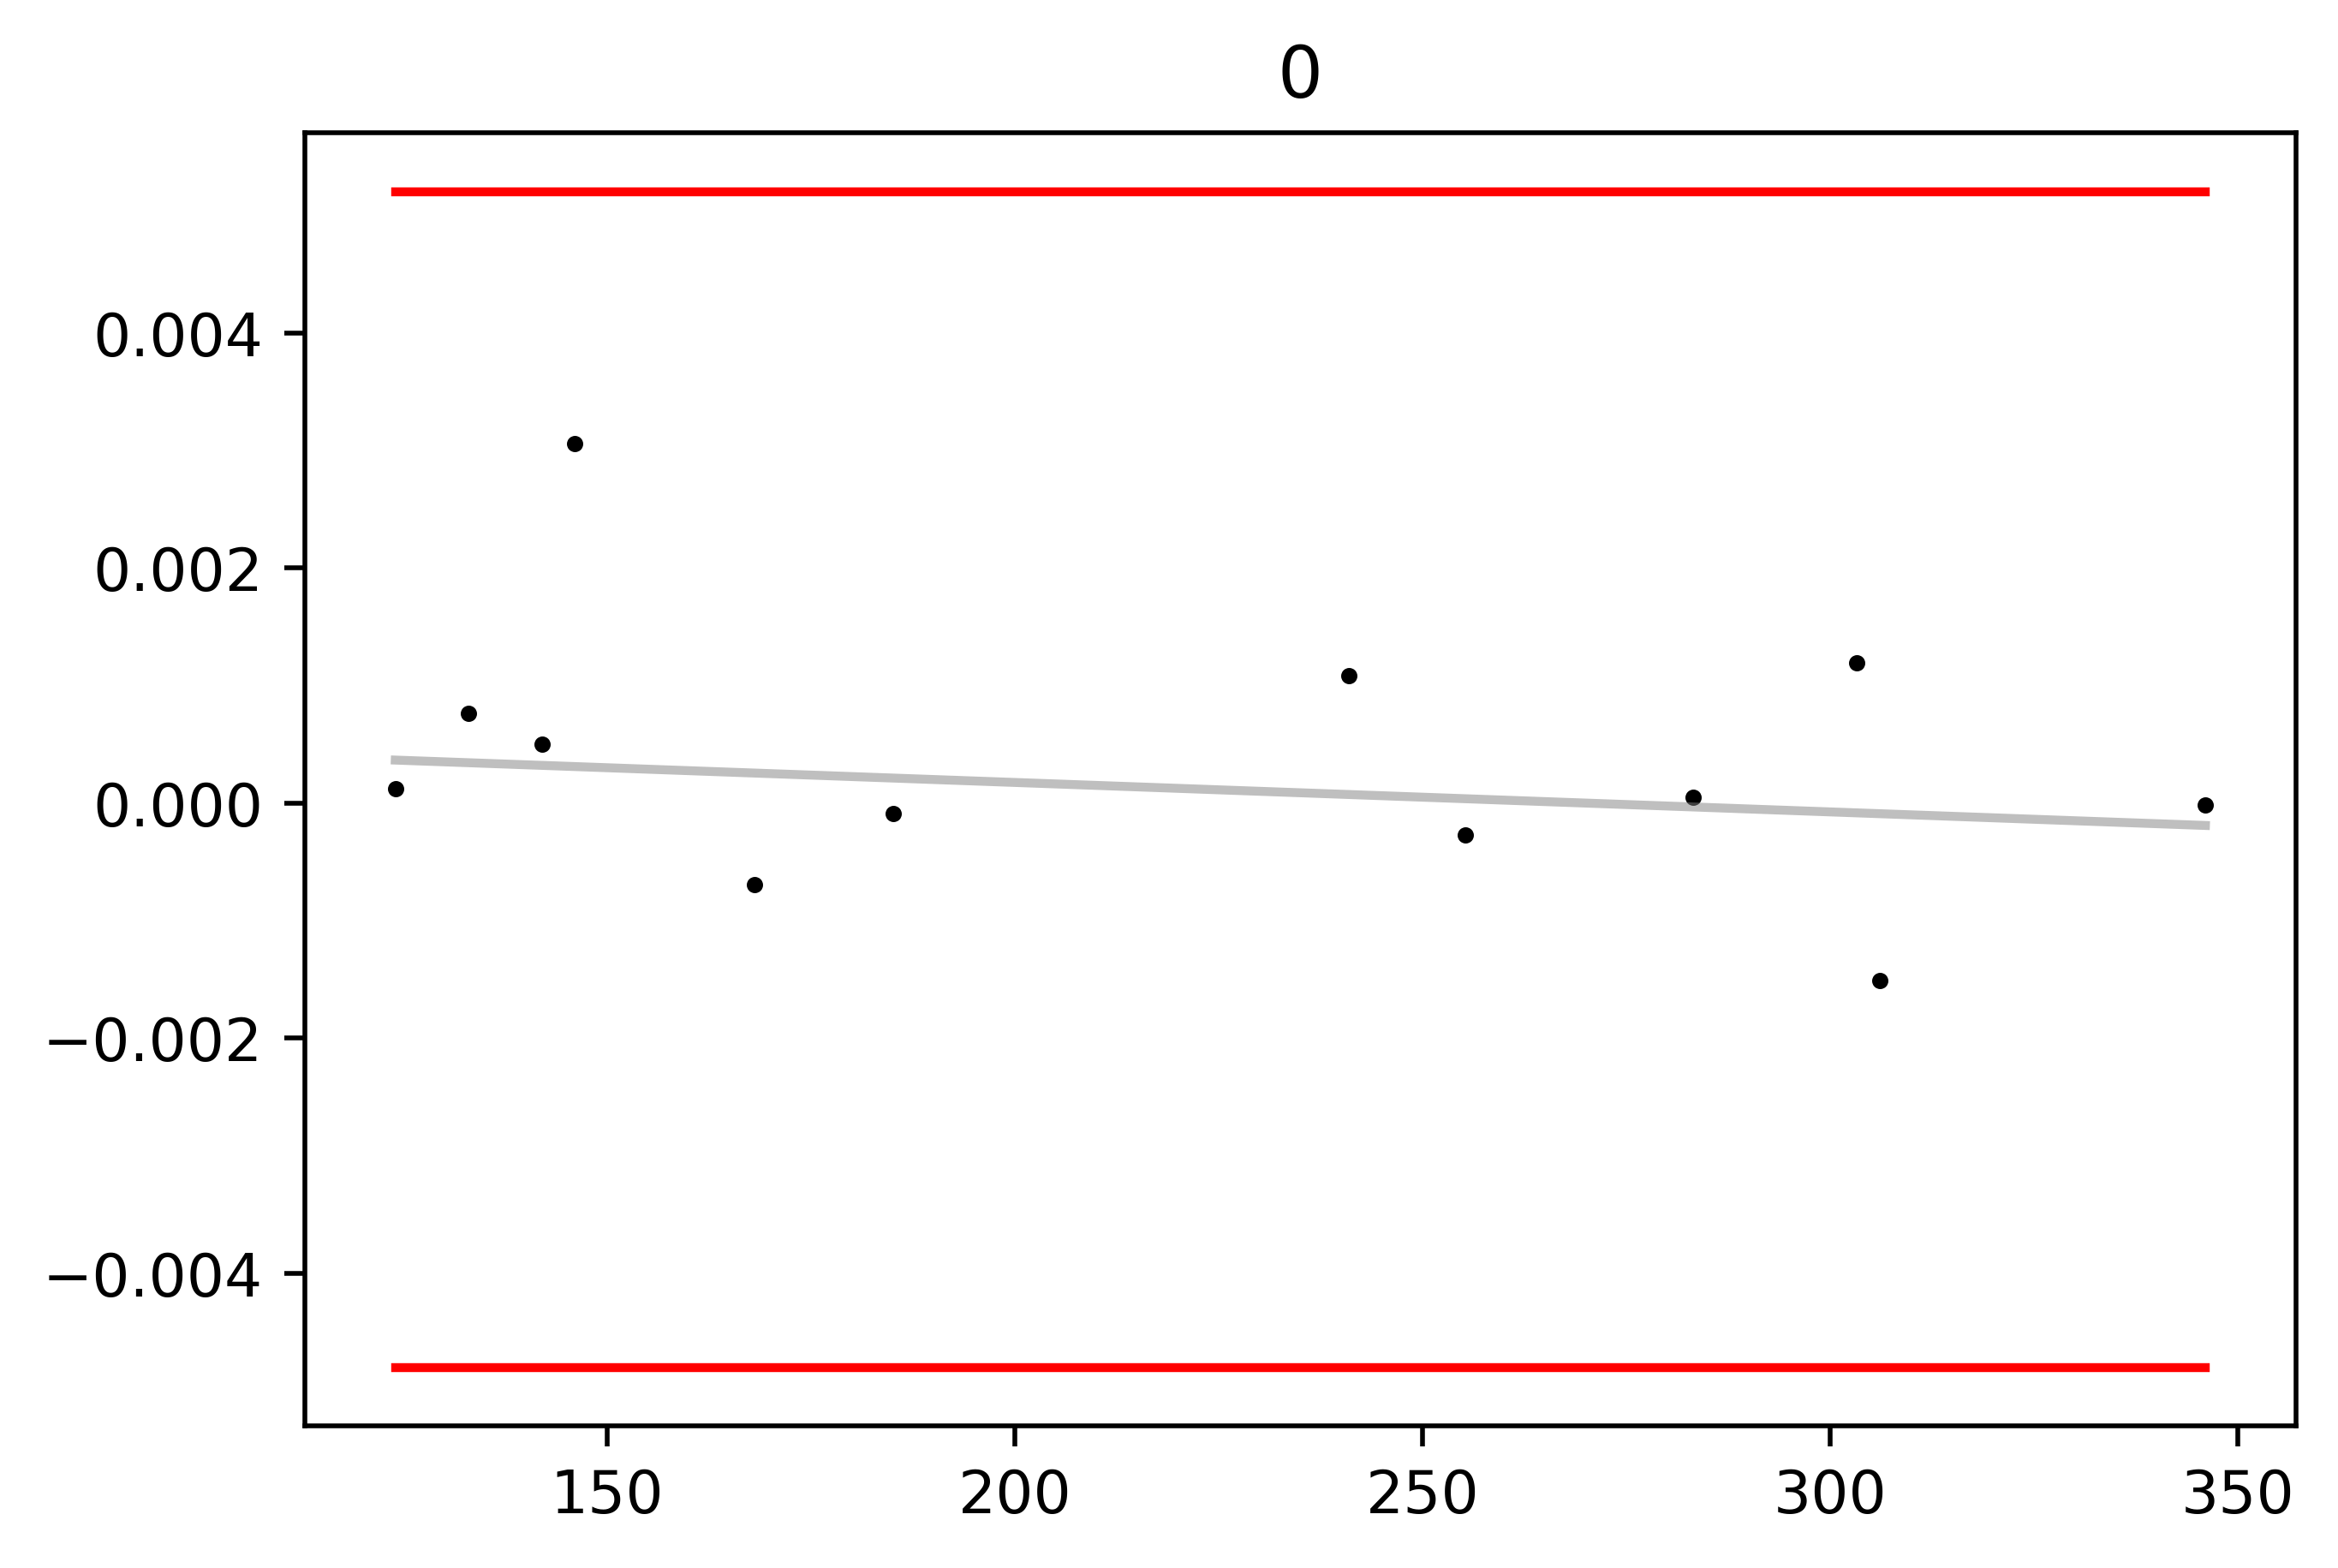

In [5]:
if __name__ == "__main__":
    tolerance = 0.01
    step = 0.002
    dalim = 0.005
    file = [x for x in os.listdir(datadir+subdirs[0]) if ".imzML" in x and "recal" not in x][1]
    filt = peaklist[peaklist[subdirs[0]] > 0.5]
    mzsCorr = list(filt["mz"].values)
    mzsCorr.sort()
    SIMSIToolBox.recalibration.visualizeParameters(datadir + subdirs[0] + "/" + file,1,tolerance,mzsCorr,step,dalim)



In [6]:
if __name__ == "__main__":
    for subdir in subdirs:
        files = [x for x in os.listdir(datadir + subdir) if ".imzML" in x and "recal" not in x]
        filt = peaklist[peaklist[subdir] > 0.5]
        mzsCorr = list(filt["mz"].values)
        mzsCorr.sort()
        for file in files:
            if file.replace(".imzML","_recal.imzML") not in os.listdir(datadir + subdir):
                print(file)
                SIMSIToolBox.recalibration.write_corrected_msi(datadir + subdir + "/" + file,datadir + subdir + "/" + file.replace(".imzML","_recal.imzML"),tolerance,mzsCorr,step,dalim,numCores=num_cores)



In [5]:
mzs = []
keys = []
for index,row in peaklist.iterrows():
    _,_,nC = SIMSIToolBox.getMzsOfIsotopologues(row["formula"],"C")
    for x in range(nC+1):
        mzs.append(row["mz"] + 1.00336 * x)
        keys.append((index,x))
print(len(mzs))

172


In [6]:
inds = []
for index,row in peaklist.iterrows():
    tmp = [x for x in range(len(keys)) if keys[x][0] == index]
    tmp.sort(key=lambda x: keys[x][1])
    inds.append(tmp)
peaklist["inds"] = inds
peaklist

ion      formula adduct          mz  \
0   C10H14N5O7P-H-  C10H14N5O7P    M-H  346.055729   
1   C10H17N3O6S-H-  C10H17N3O6S    M-H  306.076451   
2        C10H9N-H-       C10H9N    M-H  142.066144   
3      C12H14N2-H-     C12H14N2    M-H  185.108343   
4      C16H32O2-H-     C16H32O2    M-H  255.232875   
5      C18H36O2-H-     C18H36O2    M-H  283.264176   
6      C20H32O2-H-     C20H32O2    M-H  303.232875   
7      C2H7NO3S-H-     C2H7NO3S    M-H  124.007309   
8       C3H7O7P-H-      C3H7O7P    M-H  184.985584   
9     C4H12NO4P-H-    C4H12NO4P    M-H  168.043039   
10       C4H6O5-H-       C4H6O5    M-H  133.014168   
11      C4H7NO4-H-      C4H7NO4    M-H  132.030153   
12    C5H10N2O3-H-    C5H10N2O3    M-H  145.061787   
13      C5H9NO3-H-      C5H9NO3    M-H  130.050888   
14      C5H9NO4-H-      C5H9NO4    M-H  146.045803   
15     C6H11O8P-H-     C6H11O8P    M-H  241.011799   
16     C6H13O9P-H-     C6H13O9P    M-H  259.022363   
17      C6H9NO5-H-      C6H9NO5    M-H  174.040717   
18     C7H12O3S-H-     C7H12O3S    M-H  175.043360   

                                     name  labeling trend  \
0                                     AMP               1   
1                             Glutathione               1   
2                       6-Methylquinoline               0   
3                              Detomidine               0   
4                               Palmitate               1   
5                                Stearate               1   
6                            Arachidonate               1   
7                                 Taurine               0   
8                                     2PG               0   
9             Phosphodimethylethanolamine               0   
10                                 Malate               0   
11                              Aspartate               0   
12                              Glutamine               0   
13                       4-hydroxyproline               0   
14                              Glutamate               0   
15              Inositol cyclic phosphate               0   
16                       Hexose phosphate               0   
17                     N-acetyl-aspartate               1   
18  Methylthio 2-(propanoyloxy)propanoate               0   

    pool size trend in tumor  14x  12x  10x  8x  100um  50um  \
0                          1    0    1    0   0      1     1   
1                          1    1    1    0   0      1     1   
2                          0    1    1    0   0      0     1   
3                          0    0    1    0   0      1     1   
4                          1    0    1    0   0      1     1   
5                          1    0    1    0   0      0     1   
6                          1    0    1    0   0      1     1   
7                          0    1    1    1   0      1     1   
8                          0    1    0    0   0      1     0   
9                          0    1    1    1   1      1     1   
10                         1    1    1    0   0      1     1   
11                         1    1    1    1   1      1     1   
12                         1    1    1    0   0      1     1   
13                         1    1    1    0   0      1     1   
14                         1    1    1    0   0      1     1   
15                         1    1    1    0   0      1     1   
16                         1    1    0    0   0      1     1   
17                         1    1    0    0   0      0     1   
18                         1    1    1    0   0      1     0   

                           comment  \
0                              NaN   
1                              NaN   
2                              NaN   
3                              NaN   
4   some interference at 14x 50 um   
5                              NaN   
6                              NaN   
7                              NaN   
8                              NaN   
9                              NaN   
10            

extracting intensities |██████████████████████████████████████████████████| 100.0% 
forming matrix |██████████████████████████████████████████████████| 100.0% 
Smoothing data |██████████████████████████████████████████████████| 100.0% 
correcting natural abundance |██████████████████████████████████████████████████| 100.0% 
extracting intensities |██████████████████████████████████████████████████| 100.0% 
forming matrix |██████████████████████████████████████████████████| 100.0% 
Smoothing data |██████████████████████████████████████████████████| 100.0% 
correcting natural abundance |██████████████████████████████████████████████████| 100.0% 
extracting intensities |██████████████████████████████████████████████████| 100.0% 
forming matrix |██████████████████████████████████████████████████| 100.0% 
Smoothing data |██████████████████████████████████████████████████| 100.0% 
correcting natural abundance |██████████████████████████████████████████████████| 100.0% 
extracting intensities

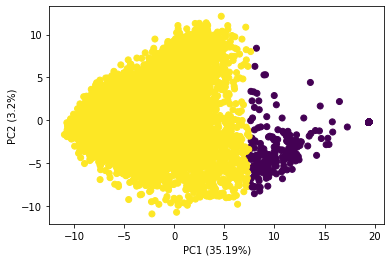

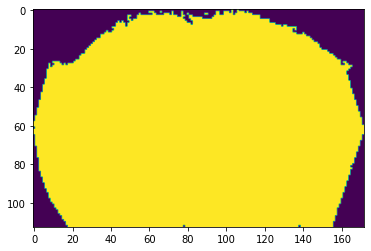

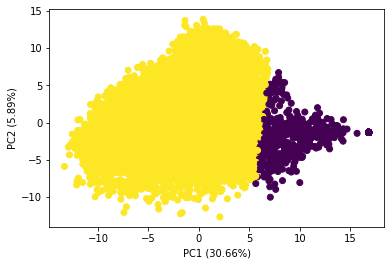

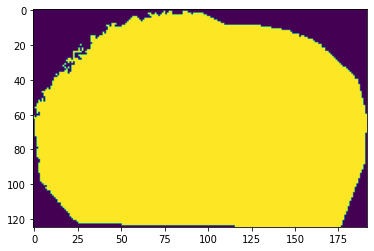

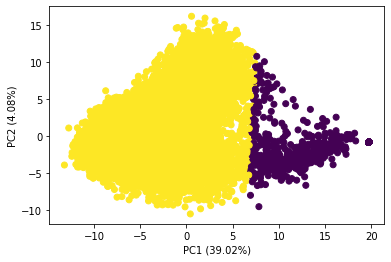

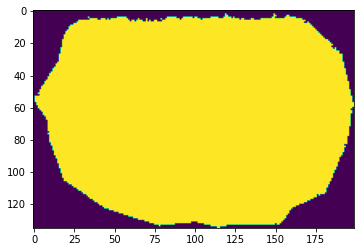

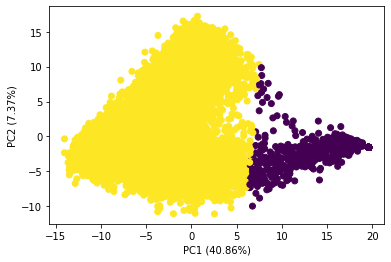

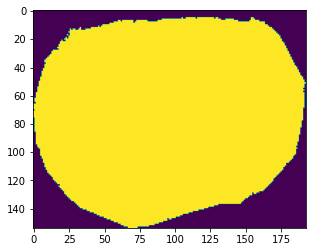

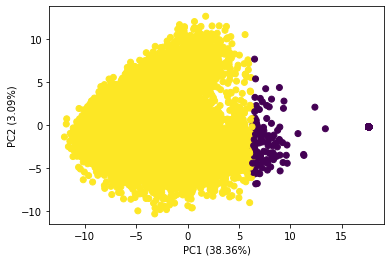

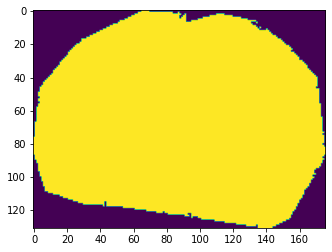

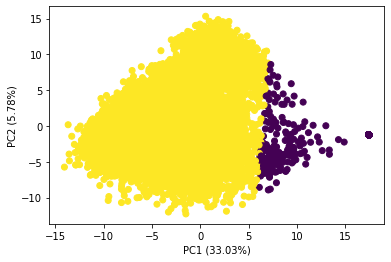

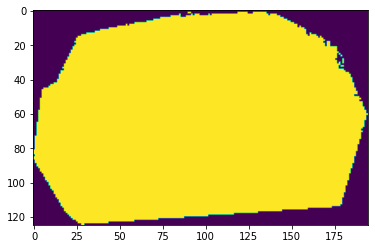

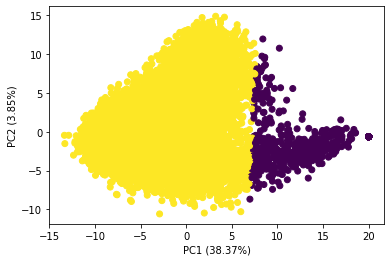

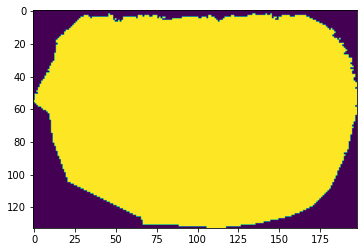

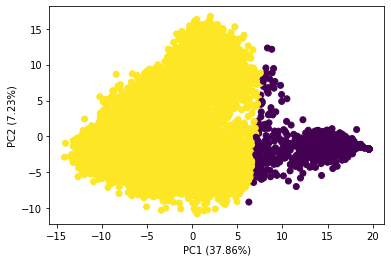

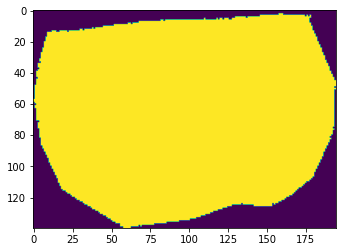

In [7]:
if __name__ == "__main__":
    msis = {}
    for subdir in subdirs:
        files = [x for x in os.listdir(datadir + subdir) if "_recal.imzML" in x]
        msis[subdir] = {}
        for file in files:
            msi = SIMSIToolBox.MSIData(mzs,ppm=ppmThresh,numCores = num_cores,intensityCutoff=intensityCutoff)
            msi.readimzML(datadir + subdir + "/" + file)
            msi.segmentImage(method=seg_method, num_latent=num_components, dm_method=dm_method,fill_holes = True)
            plt.figure()
            plt.imshow(msi.imageBoundary)
            msi.smoothData(filtMethod,convSquare)
            msi.correctNaturalAbundance(peaklist["formula"].values,peaklist["inds"].values)
            msis[subdir][file] = msi



extracting intensities |██████████████████████████████████████████████████| 100.0% 
Smoothing data |██████████████████████████████████████████████████| 100.0% 
correcting natural abundance |██████████████████████████████████████████████████| 100.0% 


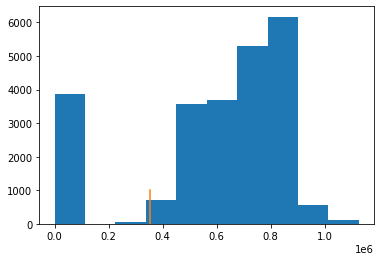

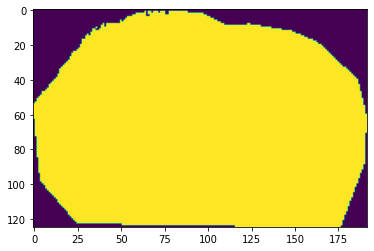

In [8]:
#resegment
if __name__ == "__main__":
    subdir = "12x"
    file = "4-2_10F-I_nedc_50um_12x_recal.imzML"
    msi = SIMSIToolBox.MSIData(mzs,ppm=ppmThresh,numCores = num_cores,intensityCutoff=intensityCutoff)
    msi.readimzML(datadir + subdir + "/" + file)
    msi.segmentImage(method="TIC_auto",fill_holes = True)
    plt.figure()
    plt.imshow(msi.imageBoundary)
    msi.smoothData(filtMethod,convSquare)
    msi.correctNaturalAbundance(peaklist["formula"].values,peaklist["inds"].values)
    msis[subdir][file] = msi



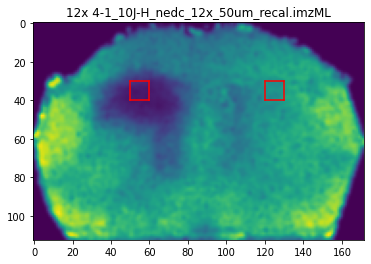

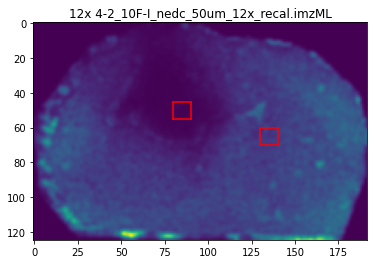

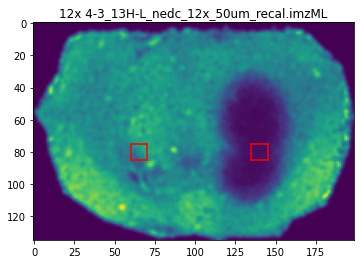

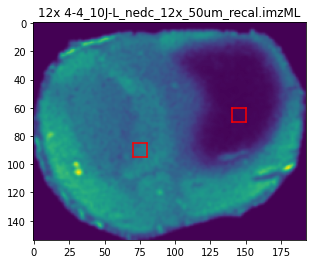

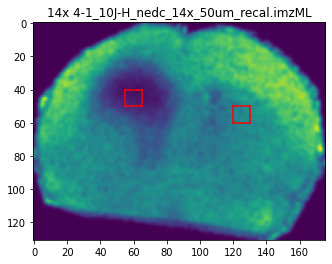

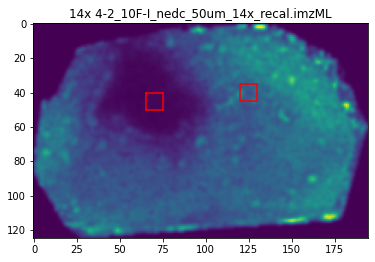

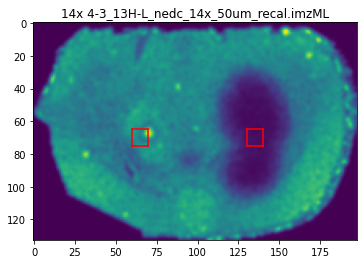

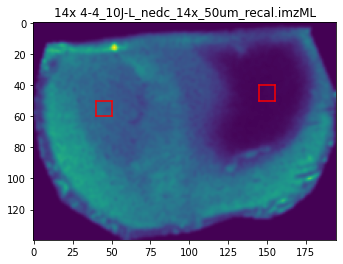

In [13]:
boxSize = 10
boxBoundaries = {"12x":{'4-1_10J-H_nedc_12x_50um_recal.imzML':{"i":[[50,50+boxSize],[30,30+boxSize]],"c":[[120,120+boxSize],[30,30+boxSize]]},
                        '4-2_10F-I_nedc_50um_12x_recal.imzML':{"i":[[80,80+boxSize],[45,45+boxSize]],"c":[[130,130+boxSize],[60,60+boxSize]]},
                        '4-3_13H-L_nedc_12x_50um_recal.imzML':{"i":[[135,135+boxSize],[75,75+boxSize]],"c":[[60,60+boxSize],[75,75+boxSize]]},
                        '4-4_10J-L_nedc_12x_50um_recal.imzML':{"i":[[140,140+boxSize],[60,60+boxSize]],"c":[[70,70+boxSize],[85,85+boxSize]]}},
                 "14x":{'4-1_10J-H_nedc_14x_50um_recal.imzML':{"i":[[55,55+boxSize],[40,40+boxSize]],"c":[[120,120+boxSize],[50,50+boxSize]]}, 
                        '4-2_10F-I_nedc_50um_14x_recal.imzML':{"i":[[65,65+boxSize],[40,40+boxSize]],"c":[[120,120+boxSize],[35,35+boxSize]]},
                        '4-3_13H-L_nedc_14x_50um_recal.imzML':{"i":[[130,130+boxSize],[65,65+boxSize]],"c":[[60,60+boxSize],[65,65+boxSize]]},
                        '4-4_10J-L_nedc_14x_50um_recal.imzML':{"i":[[145,145+boxSize],[40,40+boxSize]],"c":[[40,40+boxSize],[50,50+boxSize]]}}}

def plotBox(xmin,xmax,ymin,ymax,color):
    plt.plot([xmin,xmax],[ymin,ymin],color)
    plt.plot([xmin,xmax],[ymax,ymax],color)
    plt.plot([xmin,xmin],[ymin,ymax],color)
    plt.plot([xmax,xmax],[ymin,ymax],color)
    
def addBox(xmin,xmax,ymin,ymax,color,image):
    image = deepcopy(image)
    image[xmin:xmax+1,ymin] = color
    image[xmin:xmax+1,ymax] = color
    image[xmin,ymin:ymax+1] = color
    image[xmax,ymin:ymax+1] = color
    return image

for subdir in subdirs:
    for fn in msis[subdir]:
        plt.figure()
        naainds = [157, 158, 159, 160, 161, 162, 163]
        plt.imshow(msis[subdir][fn].data_tensor[naainds,:,:].sum(axis=0))
        plt.title(subdir + " " + fn)    
        
        box1 = boxBoundaries[subdir][fn]["i"]
        box2 = boxBoundaries[subdir][fn]["c"]

        plotBox(*box1[0],*box1[1],"red")
        plotBox(*box2[0],*box2[1],"red")


In [14]:


def extractLabelingPattern(data,xmin,xmax,ymin,ymax,badInds=[]):
    roi = []
    for x in range(xmin,xmax+1):
        for y in range(ymin,ymax+1):
            roi.append(data[:,x,y])
    roi = np.array(roi)
    
    df  = {}
    aveLabelings = []
    for row in roi:
        for b in badInds:
            row[b] = 0.0
        aveLabelings.append(np.sum([x*row[x] for x in range(len(row))]) / len(row) * np.sum([row[x] for x in range(len(row))]))
        row = row / np.sum(row)
        for x in range(len(row)):
           df[len(df)] = {"isotopologue":"M"+str(x),"Isotopologue Fraction":row[x]}

    df = pd.DataFrame.from_dict(df,orient="index")
    print(np.mean(aveLabelings),np.std(aveLabelings))
    return df

def extractLabelingPatternForStacked(data,xmin,xmax,ymin,ymax):

    roi = []
    for x in range(xmin,xmax+1):
        for y in range(ymin,ymax+1):
            roi.append(data[:,x,y])
    roi = np.array(roi)
    
    roi = roi.mean(axis=0)
    
    df  = {}
    for x in range(len(roi)):
       df[len(df)] = {"isotopologue":"M"+str(x),"Isotopologue Fraction":roi[x]}

    df = pd.DataFrame.from_dict(df,orient="index")
    
    df = df.set_index("isotopologue")

    return df


c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:71: RuntimeWarning: invalid value encountered in true_divide


C10H14N5O7P 4-1_10J-H_nedc_12x_50um_recal.imzML ips
0.4127306713925876 0.020232582763326238
C10H14N5O7P 4-1_10J-H_nedc_12x_50um_recal.imzML cont
0.18153079459786844 0.0189253388783504


c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:71: RuntimeWarning: invalid value encountered in true_divide


C10H14N5O7P 4-2_10F-I_nedc_50um_12x_recal.imzML ips
0.36946083713451583 0.030190130046852982
C10H14N5O7P 4-2_10F-I_nedc_50um_12x_recal.imzML cont
0.1637482008434178 0.016578642782662956


c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:71: RuntimeWarning: invalid value encountered in true_divide


C10H14N5O7P 4-3_13H-L_nedc_12x_50um_recal.imzML ips
0.47145401782226676 0.018113434934098182
C10H14N5O7P 4-3_13H-L_nedc_12x_50um_recal.imzML cont
0.1752773926072915 0.0226898303598085


c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:71: RuntimeWarning: invalid value encountered in true_divide


C10H14N5O7P 4-4_10J-L_nedc_12x_50um_recal.imzML ips
0.48920499730696276 0.01442734540334959


c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:105: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


C10H14N5O7P 4-4_10J-L_nedc_12x_50um_recal.imzML cont
0.186946494232645 0.01769448709994474


c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:71: RuntimeWarning: invalid value encountered in true_divide


C16H32O2 4-1_10J-H_nedc_12x_50um_recal.imzML ips
0.23322375670638984 0.029653981482877765
C16H32O2 4-1_10J-H_nedc_12x_50um_recal.imzML cont
0.048309889091974756 0.01127871038567185


c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:71: RuntimeWarning: invalid value encountered in true_divide


C16H32O2 4-2_10F-I_nedc_50um_12x_recal.imzML ips
0.2080241640732082 0.029848175994349014
C16H32O2 4-2_10F-I_nedc_50um_12x_recal.imzML cont
0.07494640963934555 0.039574525043905316


c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:71: RuntimeWarning: invalid value encountered in true_divide


C16H32O2 4-3_13H-L_nedc_12x_50um_recal.imzML ips
0.29455278577264443 0.0472324718034527
C16H32O2 4-3_13H-L_nedc_12x_50um_recal.imzML cont
0.05169297118552753 0.021155586015673297


c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:71: RuntimeWarning: invalid value encountered in true_divide


C16H32O2 4-4_10J-L_nedc_12x_50um_recal.imzML ips
0.28236004971241757 0.024107788910987353
C16H32O2 4-4_10J-L_nedc_12x_50um_recal.imzML cont
0.08865649165362076 0.011904660712348126


c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:71: RuntimeWarning: invalid value encountered in true_divide


C18H36O2 4-1_10J-H_nedc_12x_50um_recal.imzML ips
0.1320606763620015 0.01747742117548982
C18H36O2 4-1_10J-H_nedc_12x_50um_recal.imzML cont
0.008303116814766696 0.0021631260548243226


c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:71: RuntimeWarning: invalid value encountered in true_divide


C18H36O2 4-2_10F-I_nedc_50um_12x_recal.imzML ips
0.14076992309968728 0.019360531776629997
C18H36O2 4-2_10F-I_nedc_50um_12x_recal.imzML cont
0.01614303178830363 0.011590201781716568


c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:71: RuntimeWarning: invalid value encountered in true_divide


C18H36O2 4-3_13H-L_nedc_12x_50um_recal.imzML ips
0.15765558194331433 0.03654423806934021
C18H36O2 4-3_13H-L_nedc_12x_50um_recal.imzML cont
0.011488829749422728 0.005455528227323783


c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:71: RuntimeWarning: invalid value encountered in true_divide


C18H36O2 4-4_10J-L_nedc_12x_50um_recal.imzML ips
0.18955092745904836 0.018943593292437375
C18H36O2 4-4_10J-L_nedc_12x_50um_recal.imzML cont
0.019251012004167248 0.002615321528789086


c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:71: RuntimeWarning: invalid value encountered in true_divide


C6H9NO5 4-1_10J-H_nedc_14x_50um_recal.imzML ips
0.5183914728686382 0.03231562215148129
C6H9NO5 4-1_10J-H_nedc_14x_50um_recal.imzML cont
0.5361641603160354 0.011826081524009907


c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:71: RuntimeWarning: invalid value encountered in true_divide


C6H9NO5 4-2_10F-I_nedc_50um_14x_recal.imzML ips
0.4266510001292589 0.056512507929773116
C6H9NO5 4-2_10F-I_nedc_50um_14x_recal.imzML cont
0.48100075408145343 0.01983445856062184


c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:71: RuntimeWarning: invalid value encountered in true_divide


C6H9NO5 4-3_13H-L_nedc_14x_50um_recal.imzML ips
0.5387401788402886 0.029181069837670756
C6H9NO5 4-3_13H-L_nedc_14x_50um_recal.imzML cont
0.596230884073454 0.02309014912074697


c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:71: RuntimeWarning: invalid value encountered in true_divide


C6H9NO5 4-4_10J-L_nedc_14x_50um_recal.imzML ips
0.4606364379801564 0.04474139342254828
C6H9NO5 4-4_10J-L_nedc_14x_50um_recal.imzML cont
0.5520726566566427 0.01211209868596016


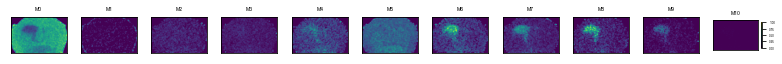

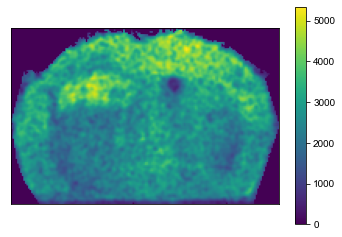

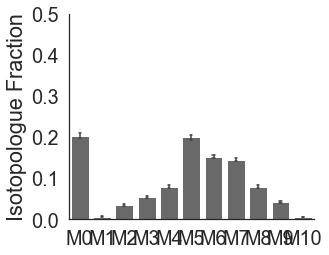

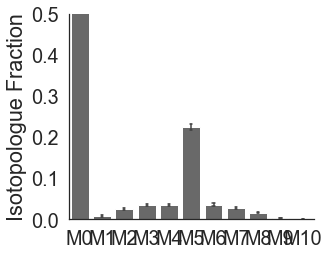

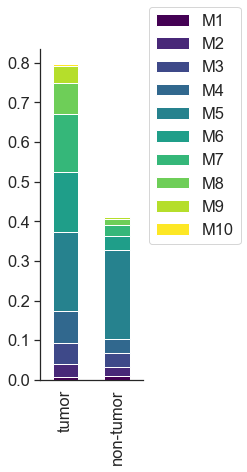

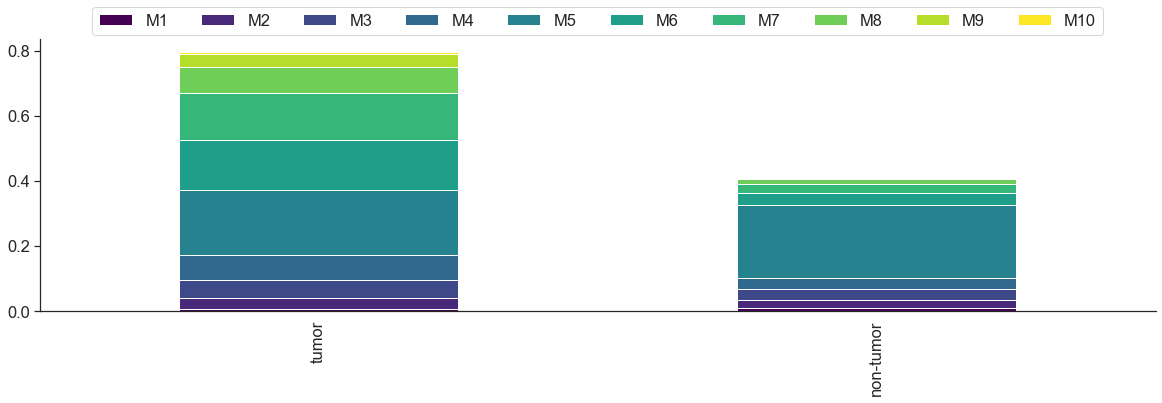

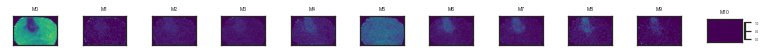

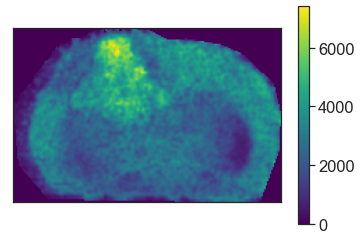

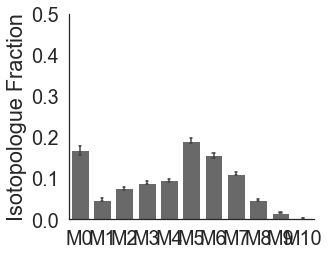

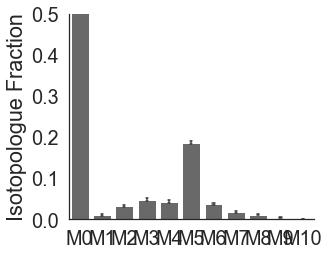

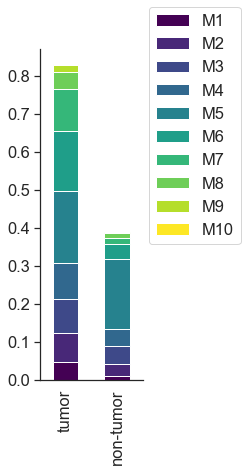

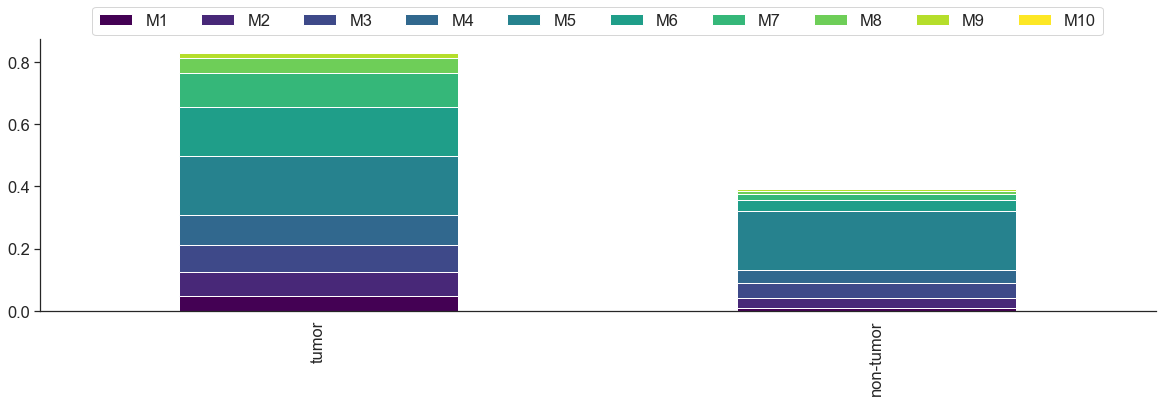

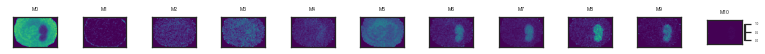

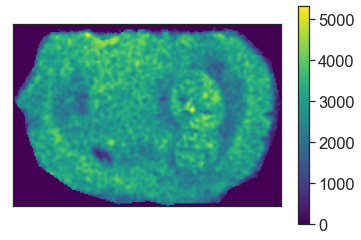

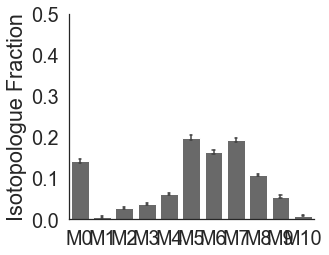

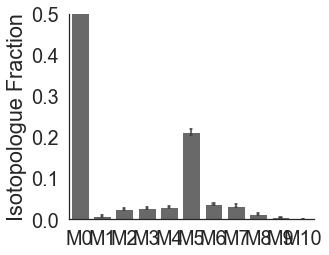

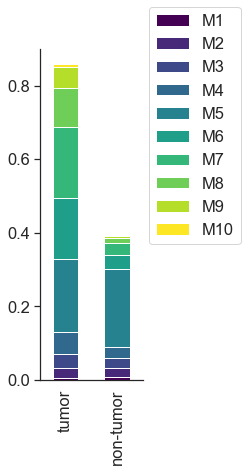

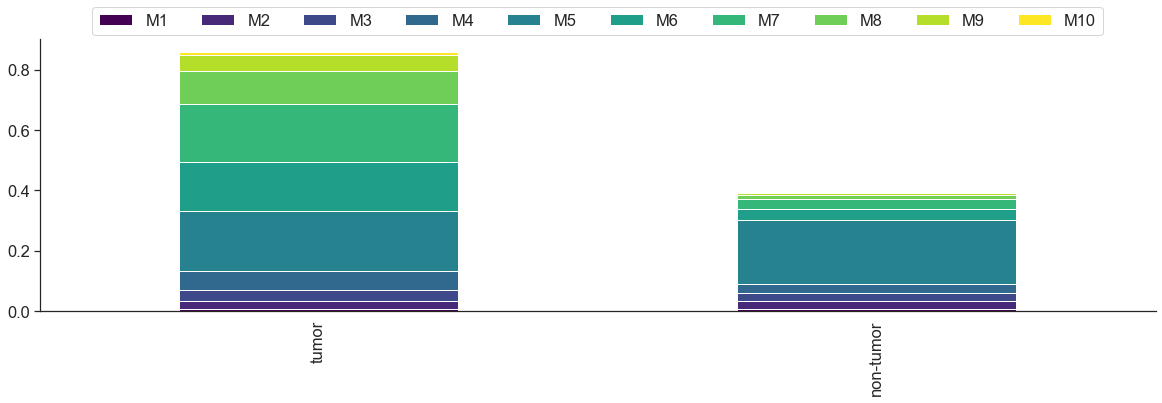

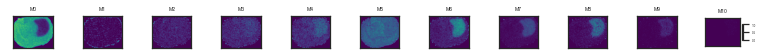

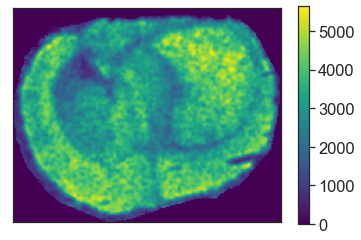

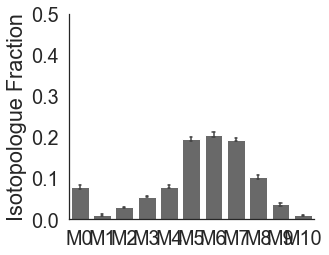

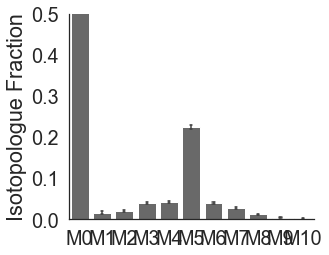

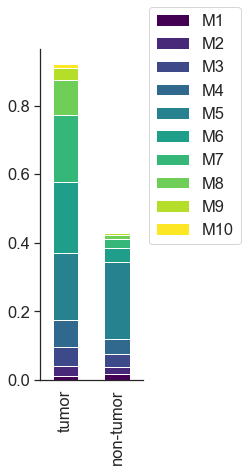

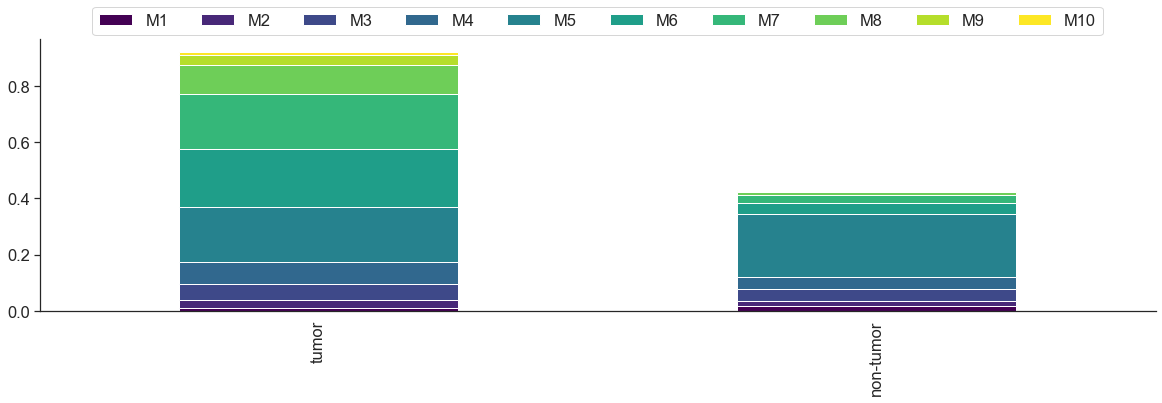

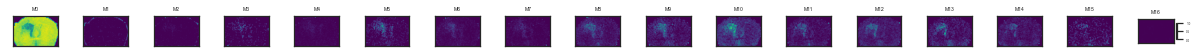

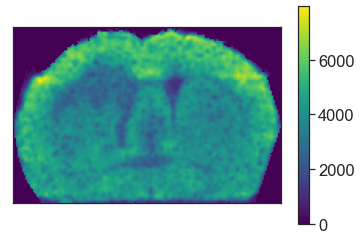

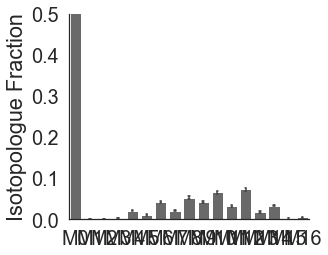

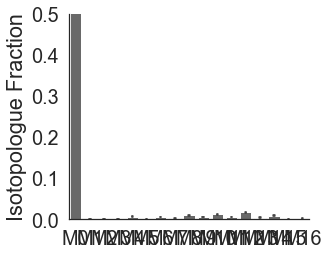

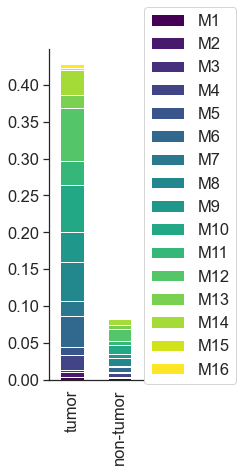

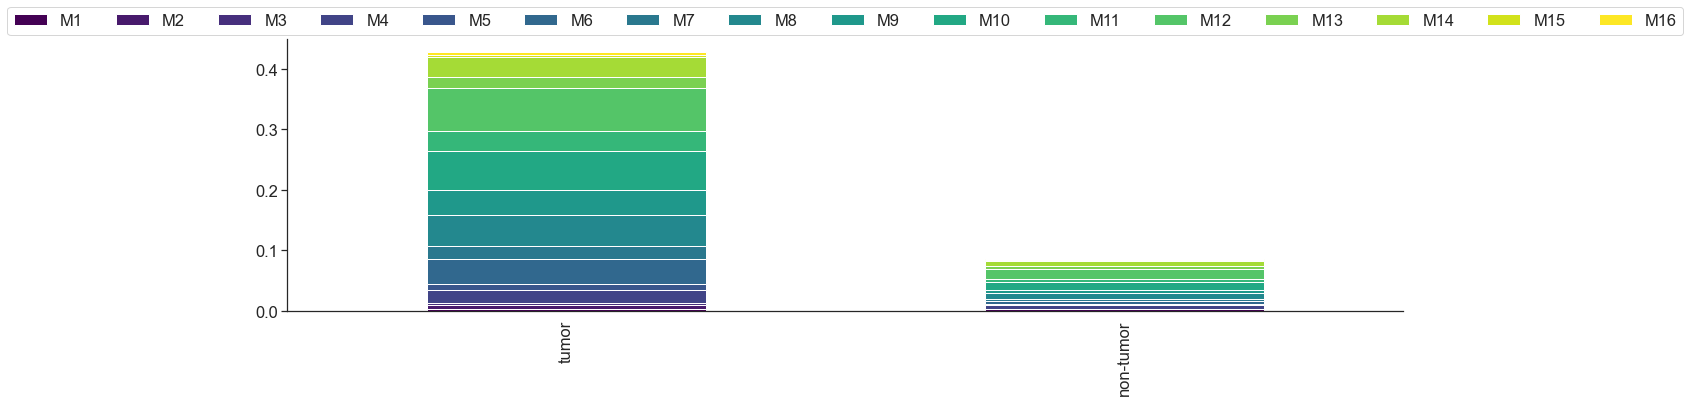

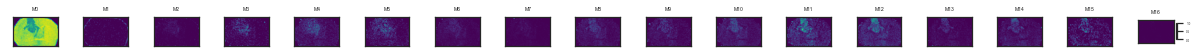

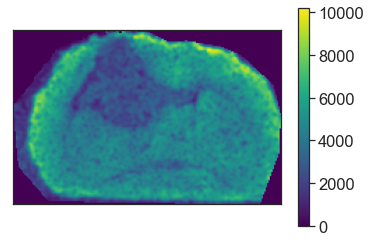

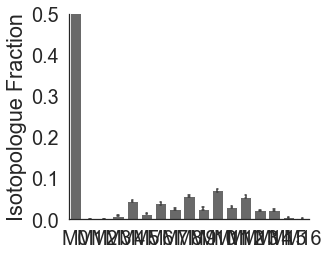

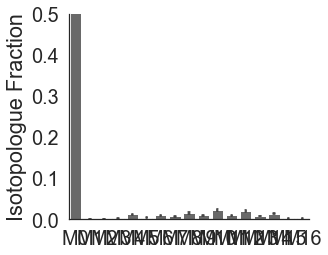

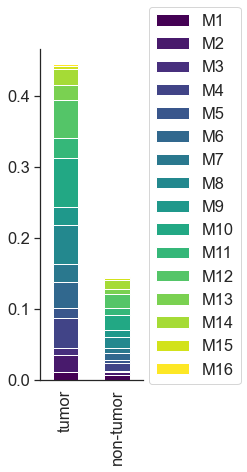

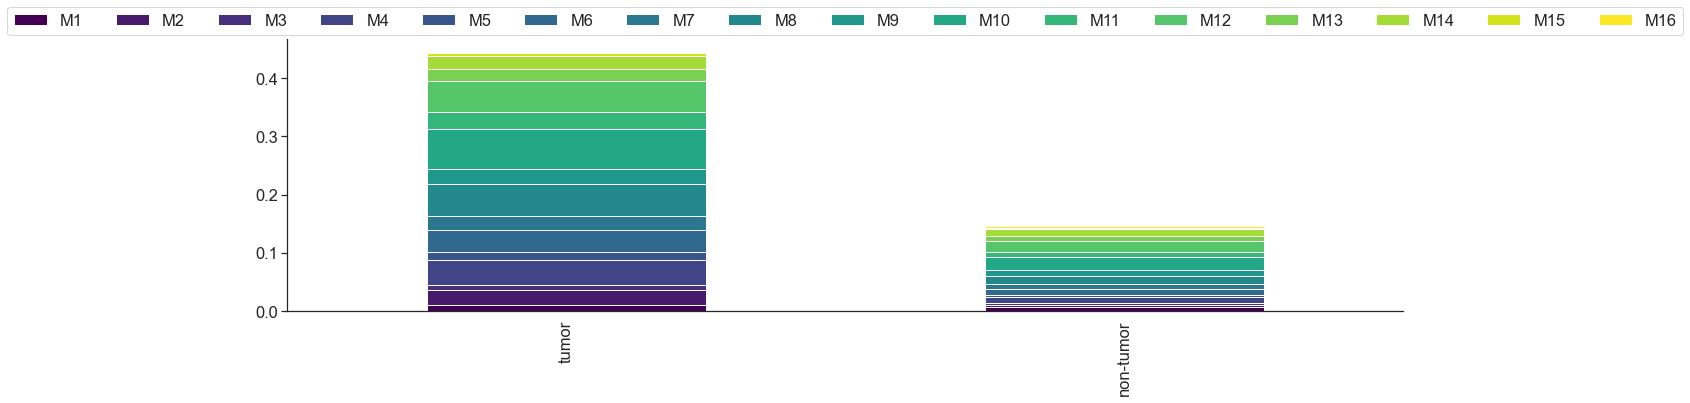

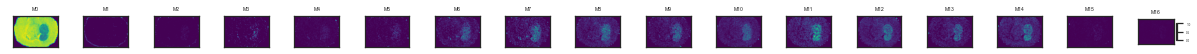

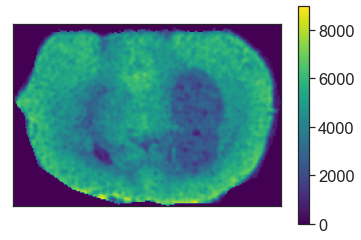

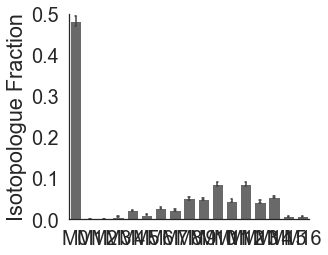

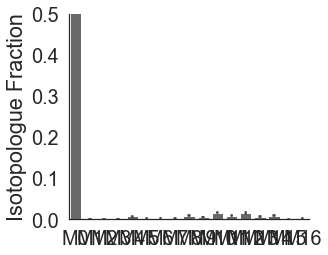

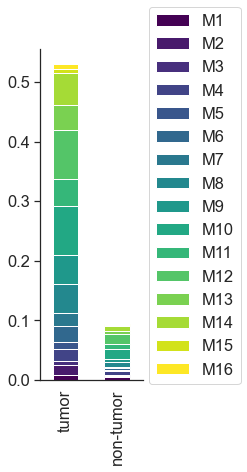

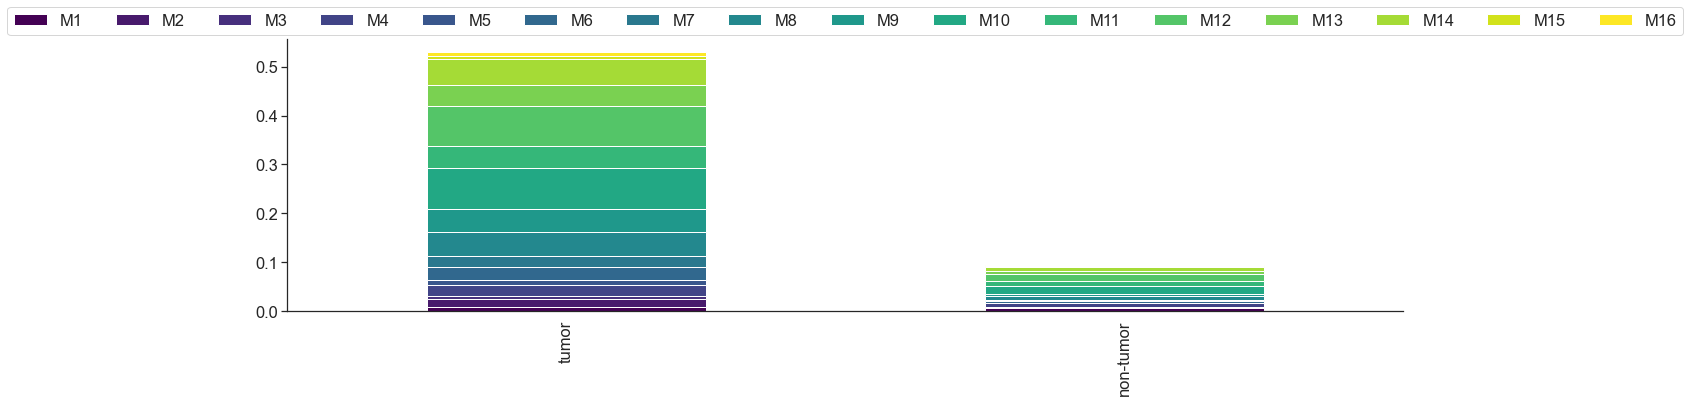

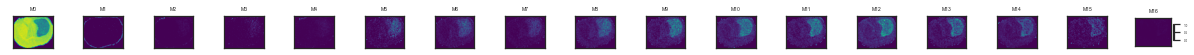

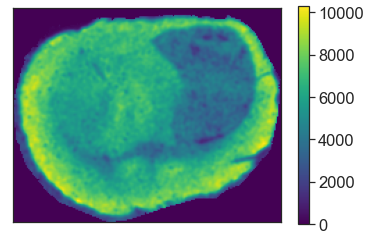

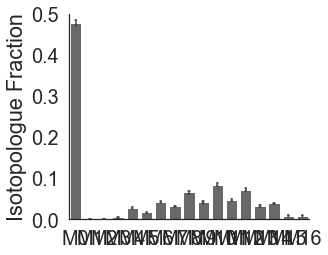

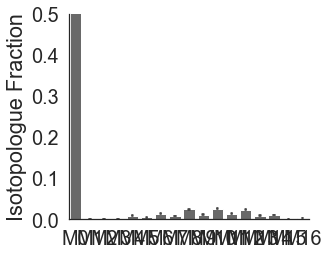

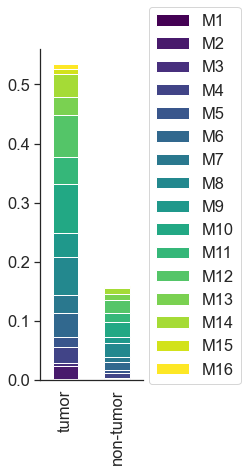

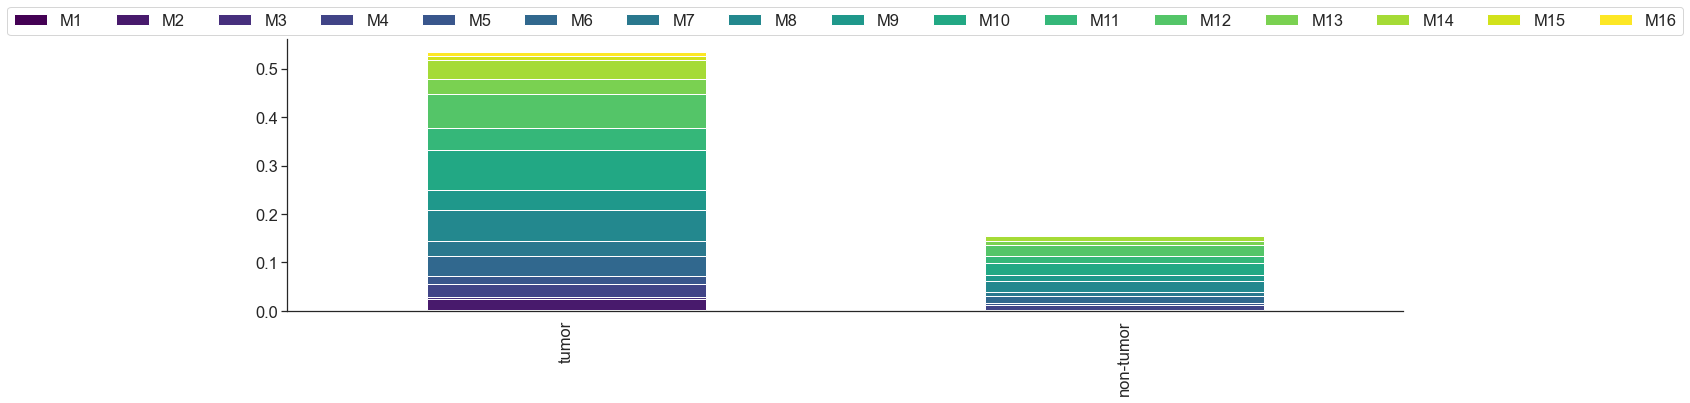

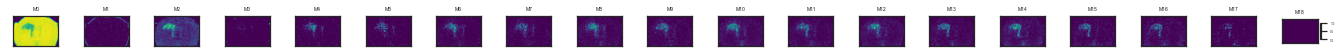

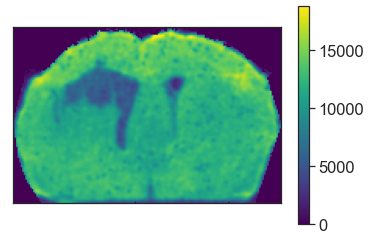

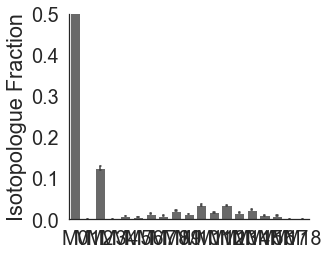

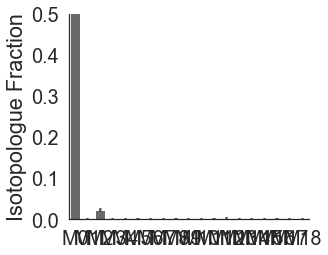

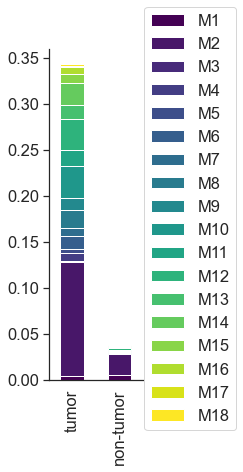

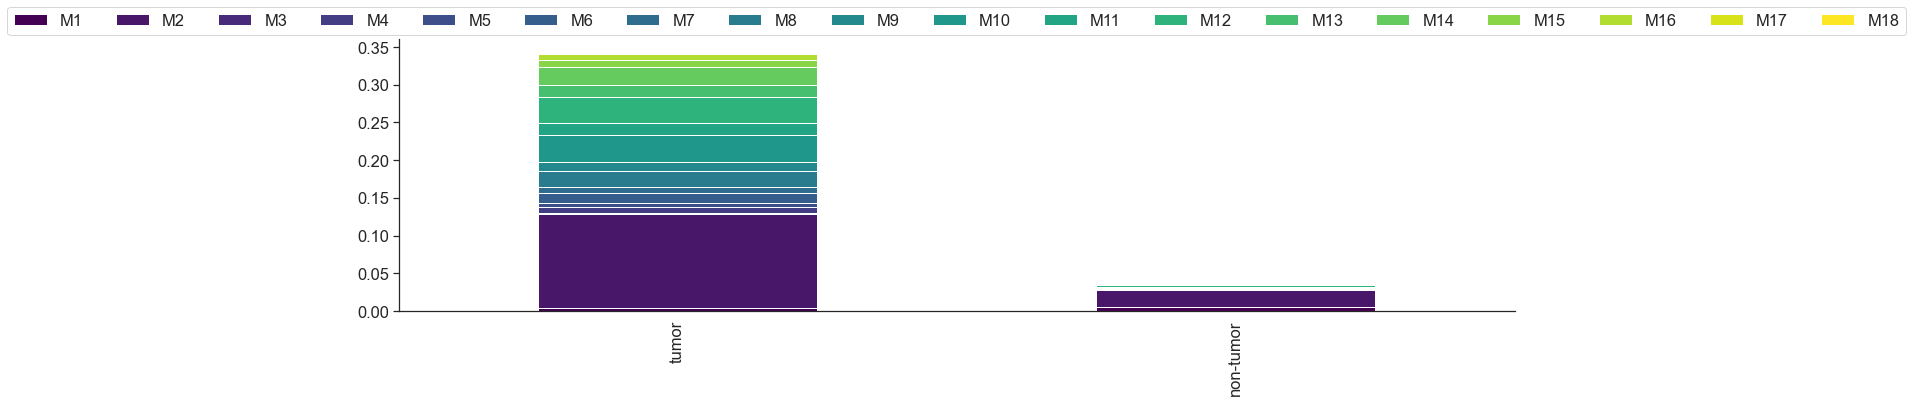

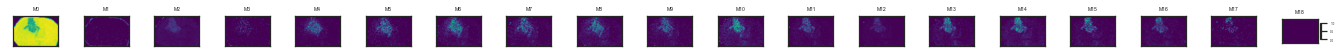

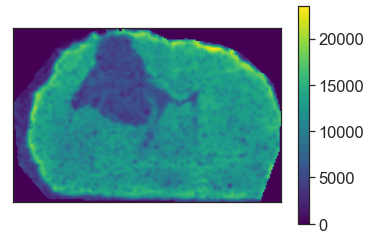

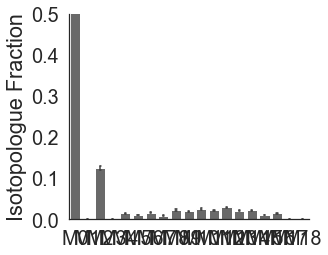

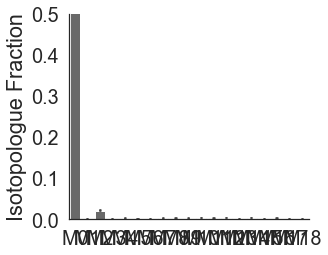

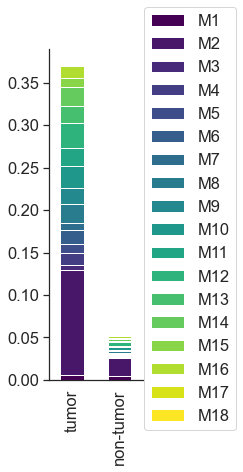

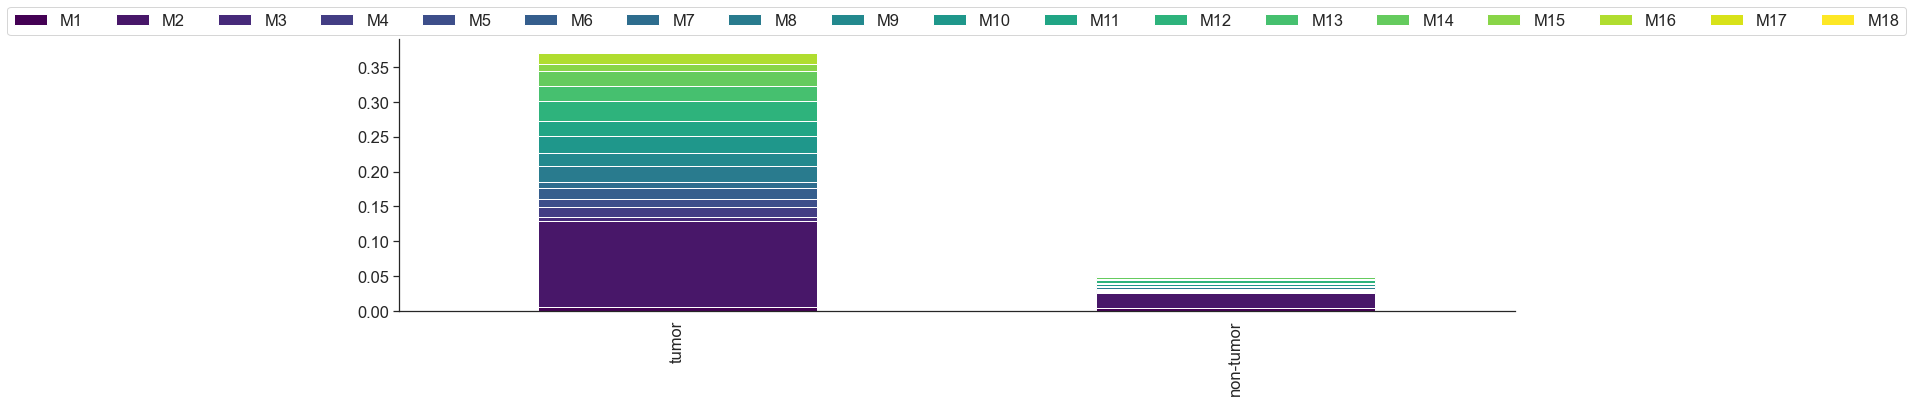

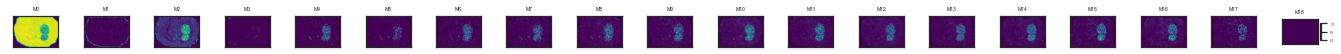

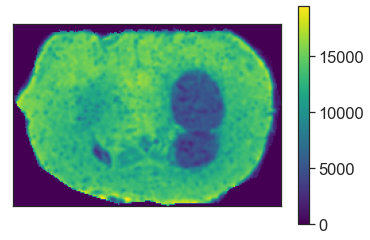

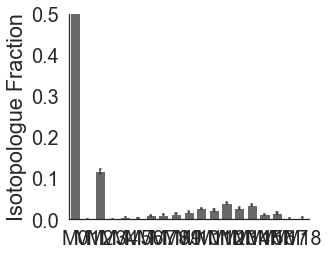

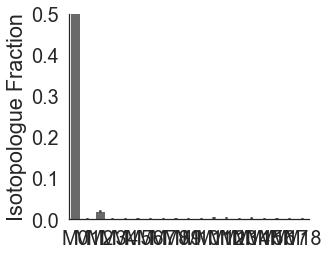

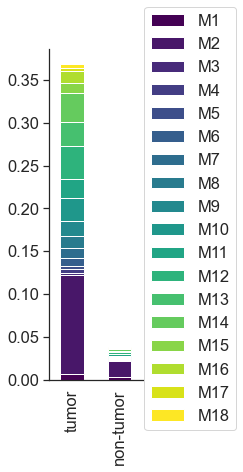

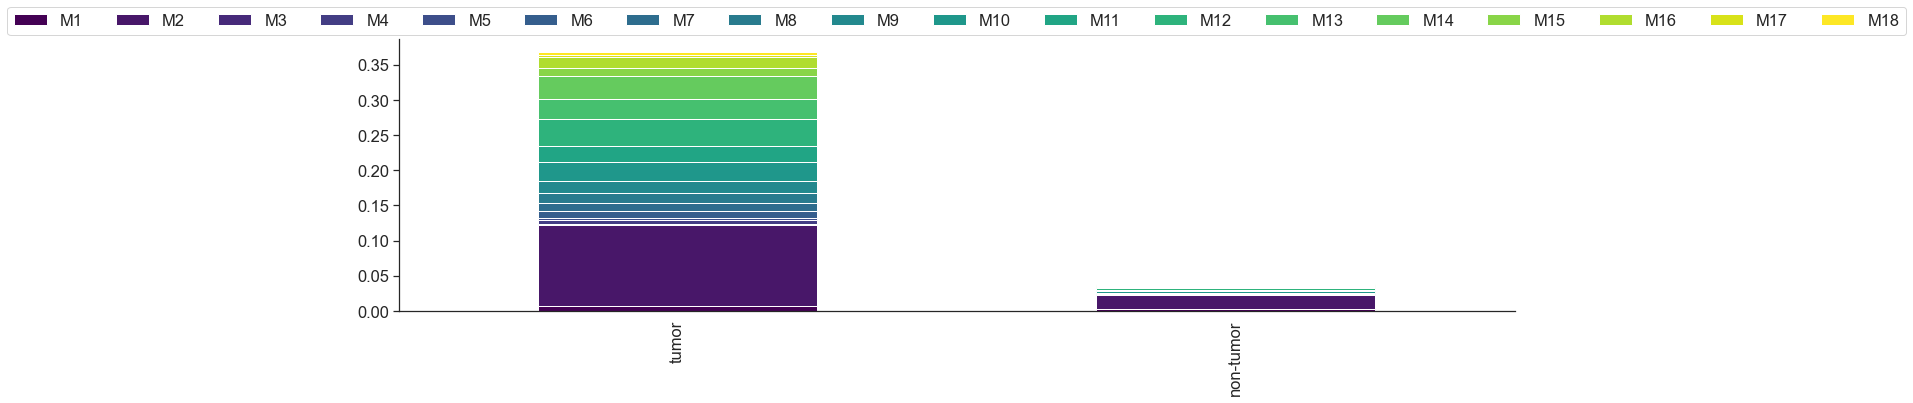

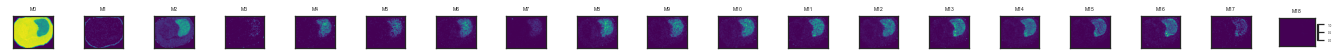

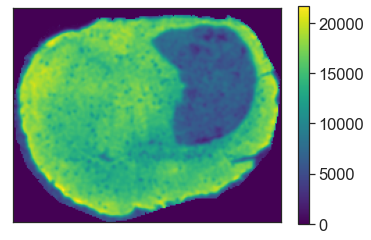

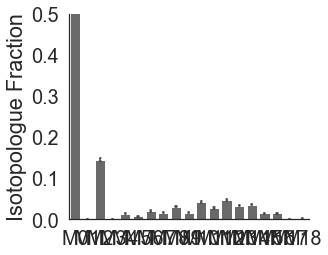

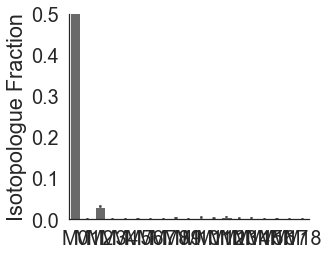

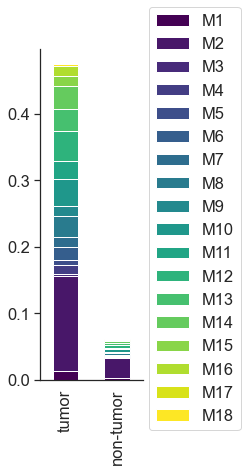

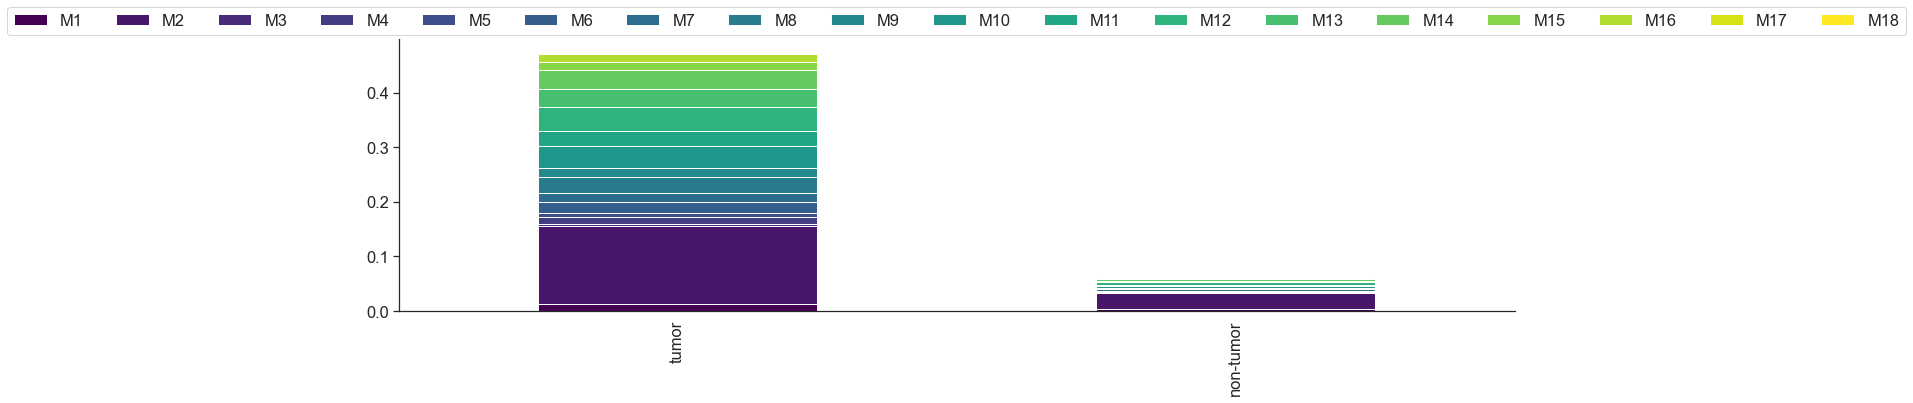

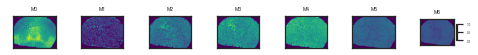

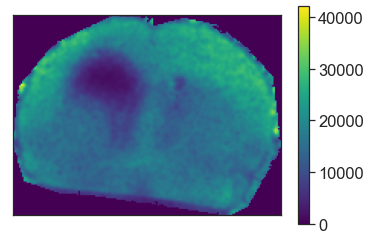

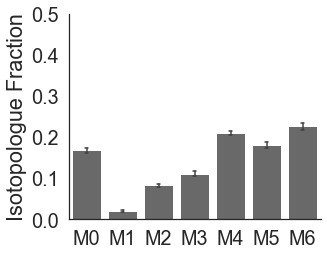

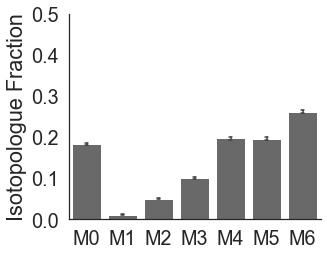

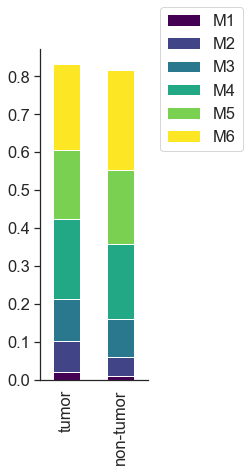

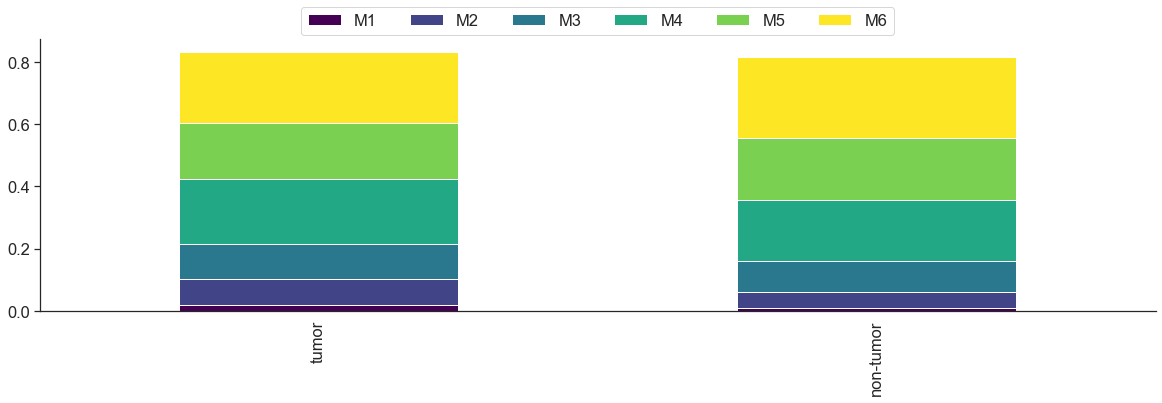

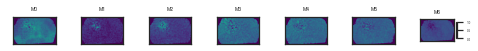

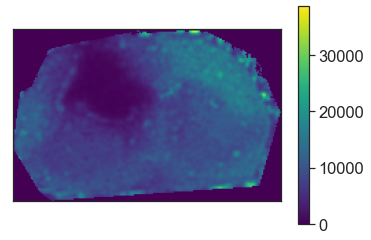

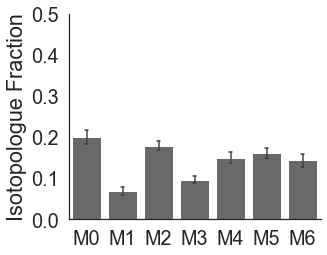

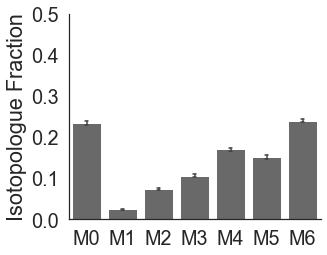

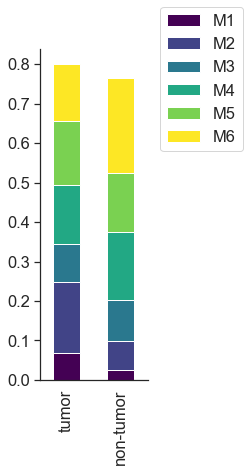

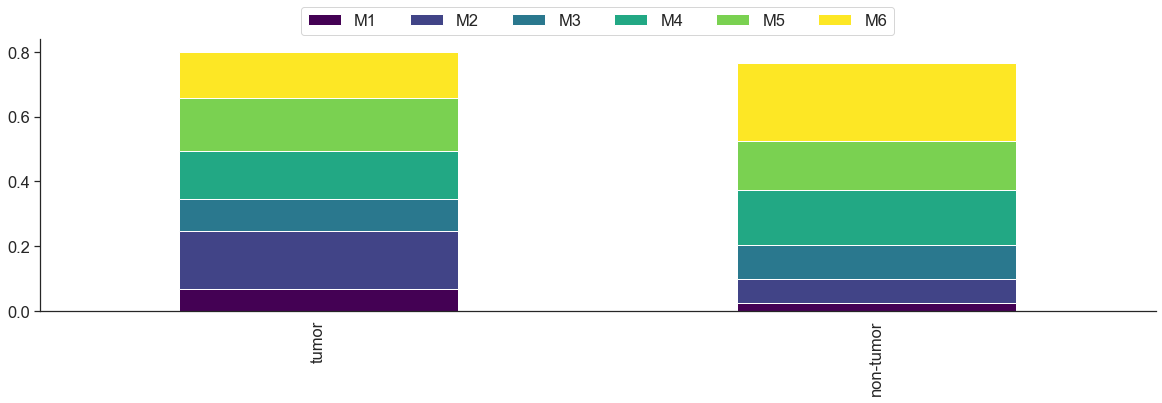

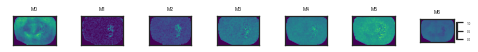

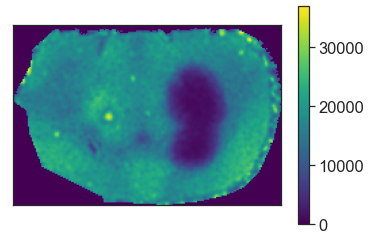

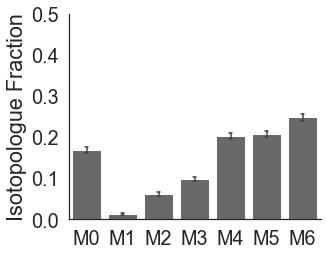

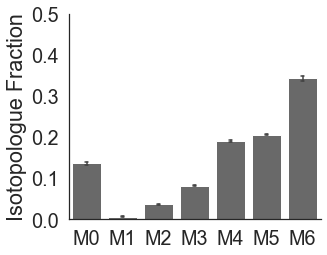

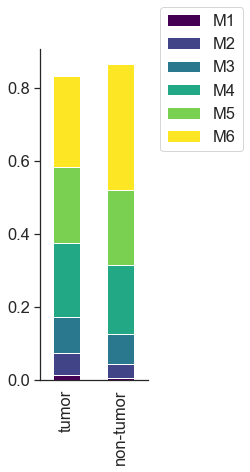

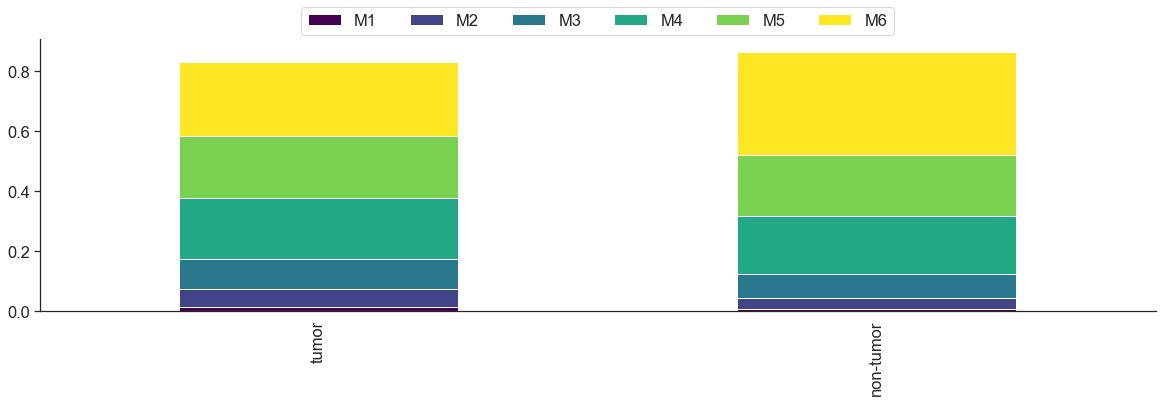

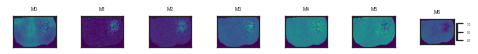

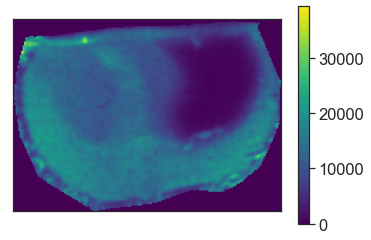

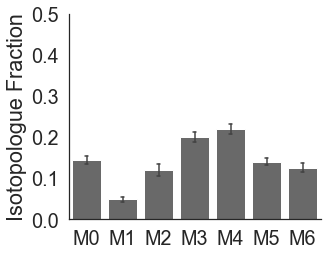

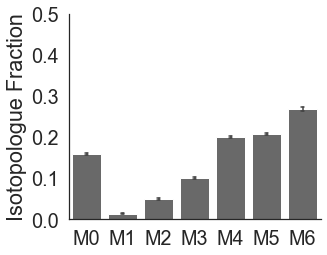

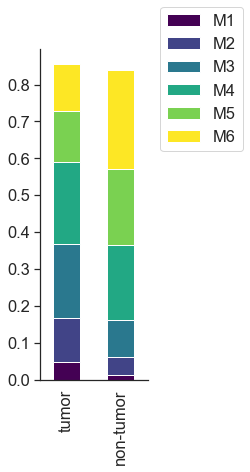

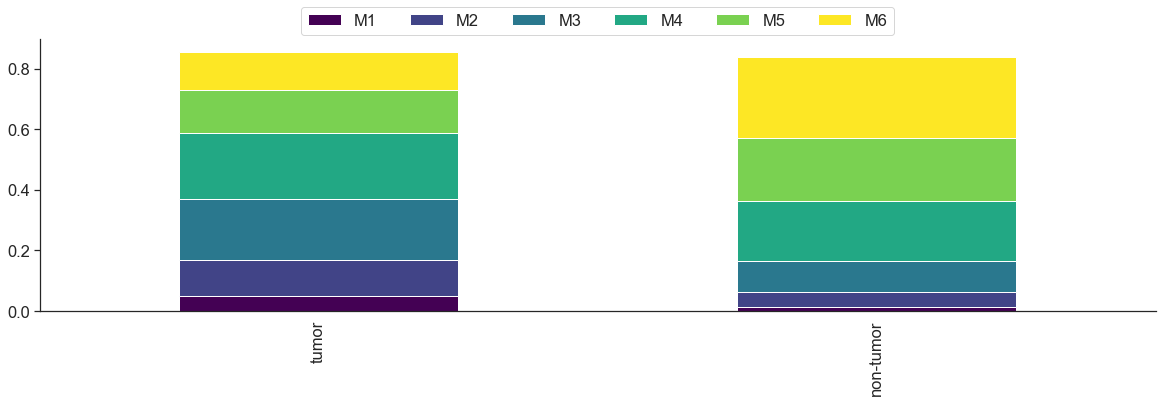

In [15]:
for subdir in subdirs:
    for fn in msis[subdir]:
        try: os.mkdir(datadir + subdir + "/" + fn.replace(".imzML",""))
        except: pass
    
maxLabs = {"C16H32O2":[1.0 for x in range(2)] + [0.1 for x in range(15)],
           "C18H36O2":[1.0 for x in range(2)] + [0.1 for x in range(17)],
           "C6H9NO5":[1.0 for x in range(7)],
           "C10H14N5O7P":[1.0 for x in range(6)] + [0.25 for x in range(5)]}
badInds = {"C16H32O2":[1,2],
       "C18H36O2":[1,3],
       "C6H9NO5":[],
       "C10H14N5O7P":[]}

averageLabeling = {subdir : {} for subdir in msis}
    
for index,row2 in peaklist.iterrows():
    inds = row2["inds"]
    if row2["for_paper"] > 0.5:
        for subdir in subdirs:
            if row2[subdir] > 0.5:
                tmpLab = {}
                for x in range(len(inds)):
                    tmpLab[row2["formula"] + "_M" + str(x)] = {}
                for fn in msis[subdir]:
                    fig, axes = plt.subplots(1,len(inds),figsize=(len(inds),1))
                    tmp = msis[subdir][fn].data_tensor[inds]
                    isoTensor = SIMSIToolBox.normalizeTensor(tmp)
                    col = 0
                    for img in isoTensor:
                        ave = np.mean(img[msis[subdir][fn].imageBoundary > 0.5])
                        tmp = axes[col].imshow(img,cmap=colormap)
                        tmpLab[row2["formula"] + "_M" + str(col)][fn] = ave
                        axes[col].set_xticks([])
                        axes[col].set_yticks([])
                        axes[col].set_title("M"+str(col),fontsize=5)
                        if col == len(isoTensor) - 1:
                            cbar = plt.colorbar(tmp, ax=axes[col],shrink=0.5)
                            tmp.set_clim(0.0,1.0)
                            cbar.ax.tick_params(labelsize=3)
                        col += 1

                    plt.tight_layout()
                    plt.savefig(datadir + subdir + "/" + fn.replace(".imzML","/") + row2["formula"] + "_iso_all.png")

                    tmp = msis[subdir][fn].data_tensor[inds]
                    isoTensor = SIMSIToolBox.normalizeTensor(tmp)
                    maxLim = 1.0
                    counter = 0
                    
                    
                    for img in isoTensor:
                        norm = plt.Normalize(vmin=0, vmax=maxLabs[row2["formula"]][counter])
                        norm = colormap(norm(img))
                        for row in range(norm.shape[0]):
                            for col in range(norm.shape[1]):
                                if msis[subdir][fn].imageBoundary[row,col] < .5:
                                    norm[row,col,3] = 0
                        plt.imsave(datadir + subdir + "/" +  fn.replace(".imzML","/") + row2["formula"] + "_M" + str(counter) +".png",norm)#,cmap=colormap)
                        counter += 1

                    plt.figure()
                    SIMSIToolBox.showImage(img,cmap = colormap)
                    plt.clim(0,maxLim)
                    plt.savefig(datadir + subdir + "/" + fn.replace(".imzML","/") + row2["formula"] + "_M" + str(counter-1) +"_withColorBar.png")
                    plt.close()

                    tmp = msis[subdir][fn].data_tensor[[inds[x] for x in range(len(inds)) if x not in badInds[row2["formula"]]]]
                    poolSize = np.sum(tmp,axis=0)
                    meanInt = np.mean(msis[subdir][fn].tic_image[msis[subdir][fn].imageBoundary > 0.5])
                    poolSize = poolSize / msis[subdir][fn].tic_image
                    poolSize[msis[subdir][fn].imageBoundary < 0.5] = 0.0
                    poolSize = poolSize * meanInt
                    plt.figure()

                    SIMSIToolBox.showImage(poolSize,cmap = colormap)
                    maxLim = np.max(poolSize)
                    plt.clim(0,maxLim)
                    norm = plt.Normalize(vmin=0, vmax=maxLim)
                    norm = colormap(norm(poolSize))
                    for row in range(norm.shape[0]):
                        for col in range(norm.shape[1]):
                            if msis[subdir][fn].imageBoundary[row,col] < .5:
                                norm[row,col,3] = 0
                    plt.imsave(datadir + subdir + "/" + fn.replace(".imzML","/") + row2["formula"] + "_pool.png",norm)#,cmap=colormap)
                    
                    box1 = boxBoundaries[subdir][fn]["i"]
                    box2 = boxBoundaries[subdir][fn]["c"]
                    
                    norm = addBox(*box1[1],*box1[0],(1.0,0,0,1.0),norm)
                    norm = addBox(*box2[1],*box2[0],(1.0,0,0,1.0),norm)
                    
                    plt.imsave(datadir + subdir + "/" + fn.replace(".imzML","/") + row2["formula"] + "_boxed_pool.png",norm)#,cmap=colormap)
                    
                    plt.savefig(datadir + subdir + "/" + fn.replace(".imzML","/") + row2["formula"] + "_pool_with_colorbar.png")
                    
                    
                    sb.set_theme(style="white",font_scale=1.8)

                    print(row2["formula"],fn,"ips")
                    df = extractLabelingPattern(isoTensor,*box1[1],*box1[0],badInds[row2["formula"]])

                    maxLabeling = 1.0
                    
                    fig,ax = plt.subplots(figsize=(5,4))

                    ax.spines['right'].set_visible(False)
                    ax.spines['top'].set_visible(False)


                    sb.barplot(data=df,x="isotopologue",y="Isotopologue Fraction",capsize=.1,color="dimgrey",errwidth=1.5)
                    plt.ylim((0,0.5))
                    plt.xlabel("")
                    plt.tight_layout()
                    plt.savefig(datadir + subdir + "/" + fn.replace(".imzML","/") + row2["formula"] + "_box1_labeling_bar.png")

                    fig,ax = plt.subplots(figsize=(5,4))
                    ax.spines['right'].set_visible(False)
                    ax.spines['top'].set_visible(False)

                    print(row2["formula"],fn,"cont")
                    df2 = extractLabelingPattern(isoTensor,*box2[1],*box2[0],badInds[row2["formula"]])
                

                    sb.barplot(data=df2,x="isotopologue",y="Isotopologue Fraction",capsize=.1,color="dimgrey",errwidth=1.5)
                    plt.ylim((0,0.5))
                    plt.xlabel("")
                    plt.tight_layout()
                    plt.savefig(datadir + subdir + "/" + fn.replace(".imzML","/") + row2["formula"] + "_box2_labeling_bar.png")
                    
                    sb.set_theme(font_scale=1.5,style={'ytick.left': True})

                    fig,ax = plt.subplots(figsize=(5,7))

                    ax.spines['right'].set_visible(False)
                    ax.spines['top'].set_visible(False)

                    df = extractLabelingPatternForStacked(isoTensor,*box1[1],*box1[0])
                    df = df.rename(mapper={"Isotopologue Fraction":"tumor"},axis=1)

                    df2 = extractLabelingPatternForStacked(isoTensor,*box2[1],*box2[0])
                    df2 = df2.rename(mapper={"Isotopologue Fraction":"non-tumor"},axis=1)

                    df = pd.concat((df,df2),axis=1,ignore_index=False).transpose()

                    df = df[[x for x in df.columns.values if x != "M0"]]

                    df.plot(kind='bar', stacked=True,ax=ax,cmap="viridis")

                    plt.legend(loc="upper center", bbox_to_anchor=(1.5, 1.15) )

                    #plt.yticks([0.0,0.05,0.1,0.15,0.2,0.25,0.30],rotation=90)

                    plt.tight_layout()

                    plt.savefig(datadir + subdir + "/" + fn.replace(".imzML","/") + row2["formula"] + "_labeling_stacked.png")

                    fig,ax = plt.subplots(figsize=(20,5))

                    df.plot(kind='bar', stacked=True,ax=ax,cmap="viridis")

                    plt.legend(loc="upper center", bbox_to_anchor=(.5, 1.15) ,ncol=len(df.columns))

                    #plt.colorbar()

                    ax.spines['right'].set_visible(False)
                    ax.spines['top'].set_visible(False)

                    plt.savefig(datadir + subdir + "/" + fn.replace(".imzML","/") + row2["formula"] + "_labeling_stacked_legend.png")


                    for key,val in tmpLab.items():
                        averageLabeling[subdir][key] = val
    
    
    

In [16]:
averageLabeling = {subdir:pd.DataFrame.from_dict(averageLabeling[subdir],orient="index") for subdir in averageLabeling}

In [17]:
for subdir,df in averageLabeling.items():
    df.to_csv(datadir + "average_labeling_" + subdir + ".csv")

In [18]:
molsOfInterest = ["C16H32O2","C18H36O2"]

In [19]:
def getMeanValueFromBox(arr,xmin,xmax,ymin,ymax):
    roi = []
    for x in range(xmin,xmax+1):
        for y in range(ymin,ymax+1):
            roi.append(arr[x,y])
    roi = np.array(roi)
    return np.mean(roi)

Running ISA |██████████████████████████████████████████████████| 100.0% 
Running ISA |██████████████████████████████████████████████████| 100.0% 
Running ISA |██████████████████████████████████████████████████| 100.0% 
Running ISA |██████████████████████████████████████████████████| 100.0% 
Running ISA |██████████████████████████████████████████████████| 100.0% 
Running ISA |██████████████████████████████████████████████████| 100.0% 
Running ISA |██████████████████████████████████████████████████| 100.0% 
Running ISA |██████████████████████████████████████████████████| 100.0% 


palmitate_g  palmitate_x0  palmitate_x1  \
4-1_10J-H_nedc_12x_50um_recal.imzML     0.149153      0.326507      0.095292   
4-2_10F-I_nedc_50um_12x_recal.imzML     0.171949      0.363628      0.084893   
4-3_13H-L_nedc_12x_50um_recal.imzML     0.172476      0.283730      0.089103   
4-4_10J-L_nedc_12x_50um_recal.imzML     0.208517      0.325189      0.075632   

                                     palmitate_x2  palmitate_g_lh  \
4-1_10J-H_nedc_12x_50um_recal.imzML      0.572489        0.422866   
4-2_10F-I_nedc_50um_12x_recal.imzML      0.547394        0.424401   
4-3_13H-L_nedc_12x_50um_recal.imzML      0.621181        0.516273   
4-4_10J-L_nedc_12x_50um_recal.imzML      0.595968        0.520341   

                                     palmitate_x0_lh  palmitate_x1_lh  \
4-1_10J-H_nedc_12x_50um_recal.imzML         0.357420         0.064637   
4-2_10F-I_nedc_50um_12x_recal.imzML         0.394359         0.062924   
4-3_13H-L_nedc_12x_50um_recal.imzML         0.305363         0.082958   
4-4_10J-L_nedc_12x_50um_recal.imzML         0.354681         0.072374   

                                     palmitate_x2_lh  palmitate_g_rh  \
4-1_10J-H_nedc_12x_50um_recal.imzML         0.577943        0.086998   
4-2_10F-I_nedc_50um_12x_recal.imzML         0.542717        0.136500   
4-3_13H-L_nedc_12x_50um_recal.imzML         0.611679        0.091896   
4-4_10J-L_nedc_12x_50um_recal.imzML         0.572945        0.158827   

                                     palmitate_x0_rh  ...  stearate_g_lh  \
4-1_10J-H_nedc_12x_50um_recal.imzML         0.316383  ...       0.212459   
4-2_10F-I_nedc_50um_12x_recal.imzML         0.339951  ...       0.230899   
4-3_13H-L_nedc_12x_50um_recal.imzML         0.276613  ...       0.239269   
4-4_10J-L_nedc_12x_50um_recal.imzML         0.370118  ...       0.311330   

                                     stearate_e_lf  stearate_x0_lh  \
4-1_10J-H_nedc_12x_50um_recal.imzML       0.217118        0.368560   
4-2_10F-I_nedc_50um_12x_recal.imzML       0.223738        0.355896   
4-3_13H-L_nedc_12x_50um_recal.imzML       0.191422        0.289398   
4-4_10J-L_nedc_12x_50um_recal.imzML       0.250148        0.349477   

                                     stearate_x1_lh  stearate_x2_lh  \
4-1_10J-H_nedc_12x_50um_recal.imzML        0.062022        0.569418   
4-2_10F-I_nedc_50um_12x_recal.imzML        0.090263        0.553841   
4-3_13H-L_nedc_12x_50um_recal.imzML        0.111554        0.599048   
4-4_10J-L_nedc_12x_50um_recal.imzML        0.076590        0.573933   

                                     stearate_g_rh  stearate_e_rh  \
4-1_10J-H_nedc_12x_50um_recal.imzML       0.011722       0.035402   
4-2_10F-I_nedc_50um_12x_recal.imzML       0.025751       0.037275   
4-3_13H-L_nedc_12x_50um_recal.imzML       0.016778       0.031707   
4-4_10J-L_nedc_12x_50um_recal.imzML       0.028010       0.053025   

                                     stearate_x0_rh  stearate_x1_rh  \
4-1_10J-H_nedc_12x_50um_recal.imzML        0.276058        0.113622   
4-2_10F-I_nedc_50um_12x_recal.imzML        0.269320        0.157889   
4-3_13H-L_nedc_12x_50um_recal.imzML        0.247233        0.152387   
4-4_10J-L_nedc_12x_50um_recal.imzML        0.268007        0.150940   

                                     stearate_x2_rh  
4-1_10J-H_nedc_12x_50um_recal.imzML        0.610320  
4-2_10F-I_nedc_50um_12x_recal.imzML        0.572790  
4-3_13H-L_nedc_12x_50um_recal.imzML        0.600379  
4-4_10J-L_nedc_12x_50um_recal.imzML        0.581053  

[4 rows x 27 columns]

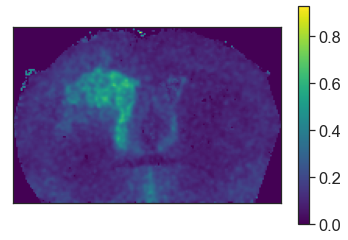

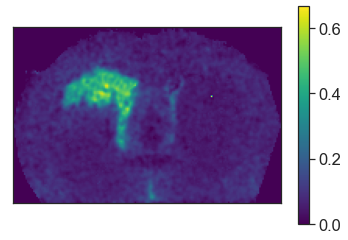

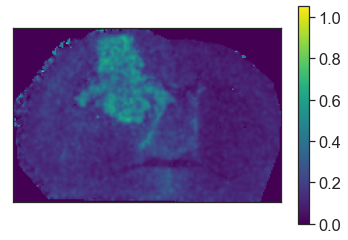

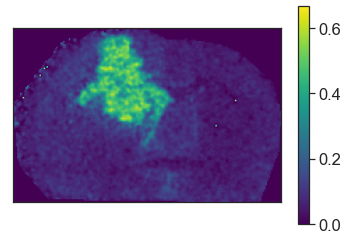

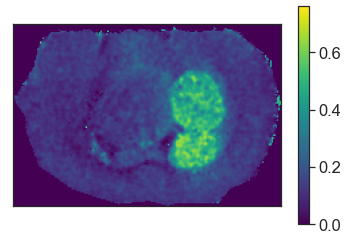

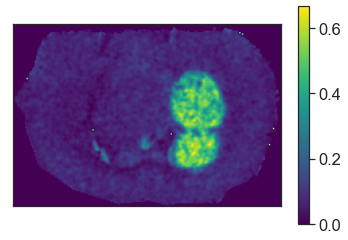

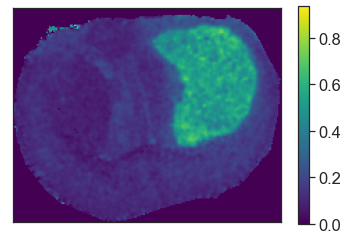

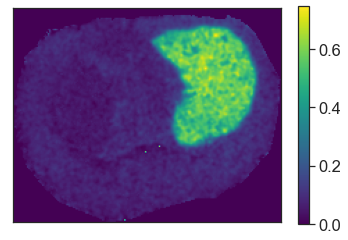

In [20]:
for subdir in subdirs:
    for fn in msis[subdir]:
        try: os.mkdir(datadir + subdir + "/" + fn.replace(".imzML",""))
        except: pass
    
badIndsPal = [1,2]
badIndsSt = [1,3]

peaklistFilt = peaklist[peaklist["formula"].isin(molsOfInterest)]
peaklistFilt = peaklistFilt.sort_values(by="mz",ascending=True)

fluxImages = {}
meanFluxes = {}

if __name__ == "__main__":
    for subdir in ["12x"]:
        for fn in msis[subdir]:
            
            box1 = boxBoundaries[subdir][fn]["i"]
            box2 = boxBoundaries[subdir][fn]["c"]
            
            fluxImages[fn] = {}
            meanFluxes[fn] = {}
            
            palmInd = peaklistFilt.index.values[0]
            stInd = peaklistFilt.index.values[1]
            
            shape = msis[subdir][fn].tic_image.shape
            
            origTensor = deepcopy(msis[subdir][fn].data_tensor)
            
            msis[subdir][fn].data_tensor[np.array(peaklistFilt.at[palmInd,"inds"])[badIndsPal]] = np.zeros((len(badIndsPal),shape[0],shape[1]))
            msis[subdir][fn].data_tensor[np.array(peaklistFilt.at[stInd,"inds"])[badIndsSt]] = np.zeros((len(badIndsSt),shape[0],shape[1]))

            fluxImageG,fluxImageE,fluxImageD,fluxImageT0,fluxImageT1,fluxImageT2,T_founds,P_trues,P_preds,numFounds,errs,errors = msis[subdir][fn].runISA(inds=peaklistFilt.at[palmInd,"inds"],isaModel="flexible",minIso=0,minFrac=0.00,NACorrected=True)            
            plt.figure()
            SIMSIToolBox.showImage(fluxImageG,cmap=colormap)  
            
            meanFluxes[fn]["palmitate_g"] = np.mean(fluxImageG[msis[subdir][fn].imageBoundary > 0.5])
            meanFluxes[fn]["palmitate_x0"] = np.mean(fluxImageT0[msis[subdir][fn].imageBoundary > 0.5])
            meanFluxes[fn]["palmitate_x1"] = np.mean(fluxImageT1[msis[subdir][fn].imageBoundary > 0.5])
            meanFluxes[fn]["palmitate_x2"] = np.mean(fluxImageT2[msis[subdir][fn].imageBoundary > 0.5])
            
            meanFluxes[fn]["palmitate_g_lh"] = getMeanValueFromBox(fluxImageG,*box1[1],*box1[0])
            meanFluxes[fn]["palmitate_x0_lh"] = getMeanValueFromBox(fluxImageT0,*box1[1],*box1[0])
            meanFluxes[fn]["palmitate_x1_lh"] = getMeanValueFromBox(fluxImageT1,*box1[1],*box1[0])
            meanFluxes[fn]["palmitate_x2_lh"] = getMeanValueFromBox(fluxImageT2,*box1[1],*box1[0])
            
            meanFluxes[fn]["palmitate_g_rh"] = getMeanValueFromBox(fluxImageG,*box2[1],*box2[0])
            meanFluxes[fn]["palmitate_x0_rh"] = getMeanValueFromBox(fluxImageT0,*box2[1],*box2[0])
            meanFluxes[fn]["palmitate_x1_rh"] = getMeanValueFromBox(fluxImageT1,*box2[1],*box2[0])
            meanFluxes[fn]["palmitate_x2_rh"] = getMeanValueFromBox(fluxImageT2,*box2[1],*box2[0])

            fluxImages[fn]["palmitate"] = {"g":fluxImageG,"e":fluxImageE,"d":fluxImageD,"x0":fluxImageT0,"x1":fluxImageT1,"x2":fluxImageT2,"errs":errs}

            
            fluxImageST,fluxImageE,fluxImageD,fluxImageT0,fluxImageT1,fluxImageT2,T_founds,P_trues,P_preds,numFounds,errs,errors = msis[subdir][fn].runISA(inds=peaklistFilt.at[stInd,"inds"],isaModel="elongation",minIso=0,minFrac=0.00,NACorrected=True)
            fluxImages[fn]["stearate"] = {"g":fluxImageST,"e":fluxImageE,"g+e":fluxImageST+fluxImageE,"d":fluxImageD,"x0":fluxImageT0,"x1":fluxImageT1,"x2":fluxImageT2,"errs":errs}

            plt.figure()
            SIMSIToolBox.showImage(fluxImageST + fluxImageE,cmap=colormap)
            
            meanFluxes[fn]["stearate_g"] = np.mean(fluxImageST[msis[subdir][fn].imageBoundary > 0.5])
            meanFluxes[fn]["stearate_e"] = np.mean(fluxImageE[msis[subdir][fn].imageBoundary > 0.5])
            meanFluxes[fn]["stearate_x0"] = np.mean(fluxImageT0[msis[subdir][fn].imageBoundary > 0.5])
            meanFluxes[fn]["stearate_x1"] = np.mean(fluxImageT1[msis[subdir][fn].imageBoundary > 0.5])
            meanFluxes[fn]["stearate_x2"] = np.mean(fluxImageT2[msis[subdir][fn].imageBoundary > 0.5])
            
            meanFluxes[fn]["stearate_g_lh"] = getMeanValueFromBox(fluxImageST,*box1[1],*box1[0])
            meanFluxes[fn]["stearate_e_lf"] = getMeanValueFromBox(fluxImageE,*box1[1],*box1[0])
            meanFluxes[fn]["stearate_x0_lh"] = getMeanValueFromBox(fluxImageT0,*box1[1],*box1[0])
            meanFluxes[fn]["stearate_x1_lh"] = getMeanValueFromBox(fluxImageT1,*box1[1],*box1[0])
            meanFluxes[fn]["stearate_x2_lh"] = getMeanValueFromBox(fluxImageT2,*box1[1],*box1[0])
            
            meanFluxes[fn]["stearate_g_rh"] = getMeanValueFromBox(fluxImageST,*box2[1],*box2[0])
            meanFluxes[fn]["stearate_e_rh"] = getMeanValueFromBox(fluxImageE,*box2[1],*box2[0])
            meanFluxes[fn]["stearate_x0_rh"] = getMeanValueFromBox(fluxImageT0,*box2[1],*box2[0])
            meanFluxes[fn]["stearate_x1_rh"] = getMeanValueFromBox(fluxImageT1,*box2[1],*box2[0])
            meanFluxes[fn]["stearate_x2_rh"] = getMeanValueFromBox(fluxImageT2,*box2[1],*box2[0])
            
            msis[subdir][fn].data_tensor = origTensor
            
        meanFluxes = pd.DataFrame.from_dict(meanFluxes,orient="index")
meanFluxes

In [21]:
meanFluxes.to_csv(datadir + "average_fluxes_" + subdir + ".csv")

In [22]:
pkl.dump([peaklist,msis,fluxImages],open(datadir + "processed_data.pkl","wb"))

In [23]:
[peaklist,msis,fluxImages] = pkl.load(open(datadir + "processed_data.pkl","rb"))

In [24]:
subdir = "12x"
for fn in fluxImages:
    for mol in fluxImages[fn]:
        for val in ["g","d","e","x0","x1","x2","g+e"]:
            if val in fluxImages[fn][mol]:
                img = fluxImages[fn][mol][val]
                plt.figure()
                SIMSIToolBox.showImage(img,cmap = colormap)
                maxLim = 1.0
                plt.clim(0,maxLim)
                norm = plt.Normalize(vmin=0, vmax=maxLim)
                norm = colormap(norm(img))
                for row in range(norm.shape[0]):
                    for col in range(norm.shape[1]):
                        if msis[subdir][fn].imageBoundary[row,col] < .5:
                            norm[row,col,3] = 0
                plt.imsave(datadir + subdir + "/" + fn.replace(".imzML","/") + mol + "_" + val + ".png",norm)#,cmap=colormap)
                plt.savefig(datadir + subdir + "/" + fn.replace(".imzML","/") + mol + "_" + val + "_with_colorbar.png")
                plt.close()